In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb


from sklearn.metrics import (
    classification_report, 
    f1_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
    auc,
    accuracy_score,
    roc_auc_score,
    plot_confusion_matrix
)

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 62)

# Project purpose

The german credit data contains financial and banking details of customers.<br> 
The given dataset contains information about individuals who have applied for credit from a bank.<br>
Each entry in the dataset represents a person, and they are classified as either good or bad credit risks based on their attributes.<br>
The task involves predicting whether the customer will repay a credit.<br>


The aim of the project was to perform exploratory data analysis of german credit data. <br>
The goal of the EDA was to gain knowledge about the features that influence credit repayment.<br>

Two models were trained as part of this project:<br>
- Logistic regression (machine learning algorithm used for solving binary classification problems)<br>
- Decision Tree (machine learning algorithm used for both classification and regression problems)<br>

Both algorithms were then evaluated using selected metrics, based on which both models were compared with each other.

# Exploratory data analysis of german credit data

Exploratory Data Analysis (EDA) is the process of investigating, analyzing, and understanding datasets before subjecting them to further analysis or modeling. Its aim is to discover characteristics and patterns in the data, identify errors and anomalies, detect relationships between variables, and select appropriate data analysis techniques.
- Problem Understanding
- Data Acquisition
- Data Familiarization and Preliminary Issue Identification
- Data Cleaning and Preprocessing
- Univariate Analysis
- Multivariate Analysis
- Further Data Cleaning and Preprocessing (if necessary)

# Data acquisition

In [2]:
# loading data

df = pd.read_csv('ml_1/german_credit_data.csv', sep=';', header=0) 

# sep=';' - columns are separated by a semicolon

# Data familiarization and preliminary issue identification

In [3]:
# Checking the size of the dataset

num_of_columns = df.shape[1]
print("Number of columns:", num_of_columns)
num_of_rows = df.shape[0]
print("Number of rows:", num_of_rows)

Number of columns: 21
Number of rows: 2003


<b>Conclusion:</b>
<br>The result of df.shape indicates that the analyzed dataset contains 2003 rows (observations) and 21 columns (features).<br>
This means that each observation has 21 attributes, which may indicate a large amount of information available in this dataset.

In [4]:
# Displaying first 10 rows of dataset

df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,4,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,4,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,2,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,2,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


<b>Conclusion:</b><br>
- Each individual is assigned a classification as either a good or bad credit risk based on a set of attributes.


# Data cleaning and preprocessing

In [5]:
#This step involves replacing the values 'good' and 'bad' with 1 and 0 respectively. 

df['class'].replace(['good', 'bad'], [1, 0], inplace=True)

In [6]:
# Displaying 5 first rows of dataset after cleaning

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,0


In [7]:
# Checking data types

df.dtypes

checking_status           object
duration                  object
credit_history            object
purpose                   object
credit_amount             object
savings_status            object
employment                object
installment_commitment    object
personal_status           object
other_parties             object
residence_since           object
property_magnitude        object
age                       object
other_payment_plans       object
housing                   object
existing_credits          object
job                       object
num_dependents            object
own_telephone             object
foreign_worker            object
class                     object
dtype: object

<b>Conclusion:</b><br>There may be a problem with the data quality as all columns have a text format (object).<br> This can lead to incorrect results, for example, if a particular column contains numbers but is incorrectly interpreted as text.

In [8]:
# Summary of basic statistical data 

df.describe() 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,2003,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
unique,7,34,6,11,922,6,6,5,5,4,5,5,54,4,4,5,5,3,3,3,3
top,no checking,24,existing paid,radio/tv,1478,<100,1<=X<4,4,male single,none,4,car,27,none,own,1,skilled,1,none,yes,1
freq,788,368,1060,560,6,1206,678,952,1096,1814,826,664,102,1628,1426,1266,1260,1690,1192,1926,1400


<b>Conclusion:</b><br>
The "checking_status" column has 2003 values for observations, while the entire dataset consists of 2001 observations. <br>
This means that two observations are missing values in these columns.

In [9]:
# Checking for missing values in columns, determining the number of missing values, and calculating the percentage of missing values in each column.

nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Number of nulls'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Number of nulls [%]'] = round((df.isnull().mean()*100), 4)
nulls_summary

,Nulls,Number of nulls,Number of nulls [%]
checking_status,False,0,0.0000
duration,True,2,0.0999
credit_history,True,2,0.0999
purpose,True,2,0.0999
credit_amount,True,2,0.0999
savings_status,True,2,0.0999
employment,True,2,0.0999
installment_commitment,True,2,0.0999
personal_status,True,2,0.0999
other_parties,True,2,0.0999


<b>Conclusion:</b><br>
The percentage of Nan values is maximum 0.0999%, so we can remove these values from our dataset.

In [10]:
# Checking unique values in the 'class' column

df['class'].unique()

array([1, 0, nan, 'class'], dtype=object)

In [11]:
# Displaying the count of unique values in the 'class' column  

df['class'].value_counts()

1        1400
0         600
class       1
Name: class, dtype: int64

###  Checking why a column name is present in a row

In [12]:
df.loc[df['class'] == 'class']

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1001,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


In [13]:
# Displaying 5 first rows

df.iloc[:1000].head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,0


In [14]:
# Displaying 5 first rows after 1001 row

df.iloc[1002:-1].head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1002,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,1
1003,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,0
1004,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
1005,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,1
1006,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,0


In [15]:
# Resetting indexes

df1 = df.iloc[:1000].reset_index(drop=True)
df2 = df.iloc[1002:-1].reset_index(drop=True)

In [16]:
if df1.equals(df2):
    print("The rows are the same")
else:
    print("The rows are different")

The rows are the same


<b>Conclusion:</b><br>
It looks like the data is duplicated. It should be removed.

In [17]:
# Removing duplicated data

df = df.drop(index=df.index[1001:])

In [18]:
# Checking unique values in the 'class' colum after removing 'class' value

df['class'].unique()

array([1, 0, nan], dtype=object)

In [19]:
# Removing Nan values

cleaned = df.dropna()

In [20]:
# Checking unique values in the 'class' colum after removing missing values

cleaned['class'].unique()

array([1, 0], dtype=object)

In [21]:
# Changing data types of selected columns to int

pd.options.mode.chained_assignment = None  # ignoring warning

cleaned['class'] = cleaned['class'].astype(int)
cleaned['credit_amount'] = cleaned['credit_amount'].astype(int)
cleaned['duration'] = cleaned['duration'].astype(int)
cleaned['installment_commitment'] = cleaned['installment_commitment'].astype(int)
cleaned['residence_since'] = cleaned['residence_since'].astype(int)
cleaned['age'] = cleaned['age'].astype(int)
cleaned['existing_credits'] = cleaned['existing_credits'].astype(int)
cleaned['num_dependents'] = cleaned['num_dependents'].astype(int)

In [22]:
# Checking data types

cleaned.dtypes

checking_status           object
duration                   int32
credit_history            object
purpose                   object
credit_amount              int32
savings_status            object
employment                object
installment_commitment     int32
personal_status           object
other_parties             object
residence_since            int32
property_magnitude        object
age                        int32
other_payment_plans       object
housing                   object
existing_credits           int32
job                       object
num_dependents             int32
own_telephone             object
foreign_worker            object
class                      int32
dtype: object

In [23]:
'''Convert categorical variable into dummy variables. 
Each variable is converted in as many 0/1 variables as there are different values.
This allows processing of categorical columns by machine learning algorithms.
'''

cleaned2 = pd.get_dummies(cleaned, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'])

In [24]:
# Creating a list of column names

columns = list(cleaned2.columns)

# Moving the "class" column to the end of the list

columns.append(columns.pop(columns.index('class')))

# Reodrering the columns in the DataFrame  

cleaned2 = cleaned2.reindex(columns=columns)

In [25]:
# Displaying 5 first rows of dataset after cleaning

cleaned2.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


In [26]:
# Checking the size of the dataset

num_of_columns = cleaned2.shape[1]
print("Number of columns:", num_of_columns)
num_of_rows = cleaned2.shape[0]
print("Number of rows:", num_of_rows)

Number of columns: 62
Number of rows: 1000


Conslusion:</br>
- We can notice that we have 62 explanatory features and one target variable (class), which determines whether the credit was repaid or not.</br>
- A small number of rows (1000) compared to the number of columns (62) can lead to overfitting of the model.

# Univariate Analysis

In [27]:
# Summary of basic statistical data after cleaning

cleaned2.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.269000,0.274000,0.063000,0.394000,0.049000,0.293000,0.088000,0.530000,0.040000,0.097000,0.01200,0.050000,0.181000,0.234000,0.01200,0.280000,0.022000,0.009000,0.103000,0.103000,0.063000,0.603000,0.048000,0.18300,0.339000,0.174000,0.172000,0.253000,0.062000,0.310000,0.050000,0.092000,0.54800,0.041000,0.052000,0.907000,0.332000,0.23200,0.154000,0.282000,0.13900,0.814000,0.047000,0.108000,0.713000,0.179000,0.148000,0.630000,0.022000,0.2000,0.596000,0.404000,0.037000,0.963000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.443662,0.446232,0.243085,0.488879,0.215976,0.455366,0.283437,0.499349,0.196057,0.296106,0.10894,0.218054,0.385211,0.423584,0.10894,0.449224,0.146757,0.094488,0.304111,0.304111,0.243085,0.489521,0.213873,0.38686,0.473607,0.379299,0.377569,0.434948,0.241276,0.462725,0.218054,0.289171,0.49794,0.198389,0.222138,0.290578,0.471167,0.42232,0.361129,0.450198,0.34612,0.389301,0.211745,0.310536,0.452588,0.383544,0.355278,0.483046,0.146757,0.4002,0.490943,0.490943,0.188856,0.188856,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000

In [28]:
# Checkin the skewness (measure of the asymmetry of the distribution)

pd.set_option('display.max_rows', None)
cleaned2.skew().sort_values(ascending=False)

purpose_retraining                               10.413713
purpose_other                                     8.977035
purpose_domestic appliance                        8.977035
purpose_repairs                                   6.527236
job_unemp/unskilled non res                       6.527236
foreign_worker_no                                 4.913027
credit_history_no credits/all paid                4.701911
other_parties_co applicant                        4.636536
other_payment_plans_stores                        4.287311
savings_status_>=1000                             4.235274
credit_history_all paid                           4.184759
purpose_education                                 4.135689
personal_status_male div/sep                      4.135689
other_parties_guarantor                           4.041610
employment_unemployed                             3.637969
checking_status_>=200                             3.602662
savings_status_500<=X<1000                        3.6026

<b>Conslusion:</b></br>
Many variables in our dataset have an asymmetrical distribution.</br>
Some variables have positive skewness (extreme values are located to the right of the mean), while others have negative skewness (extreme values are located to the left of the mean).<br>
Skewed data can  pose challenges for statistical modeling, as many statistical models assume a normal or symmetric distribution.

In [29]:
# The percentage of bad customers

bad_percentage = (cleaned2['class'].value_counts()[0] / len(df)) * 100
print(f"The percentage of bad customers: {bad_percentage:.2f}%")

# The percentage of good customers

good_percentage = (cleaned2['class'].value_counts()[1] / len(df)) * 100
print(f"The percentage of good customer: {good_percentage:.2f}%")

The percentage of bad customers: 29.97%
The percentage of good customer: 69.93%


In [30]:
#The number of good and bad customers

counts = cleaned2['class'].value_counts()
counts

print(f"Number of bad customers: {counts[1]:}")
print(f"Number of good customers: {counts[0]:}")

Number of bad customers: 700
Number of good customers: 300


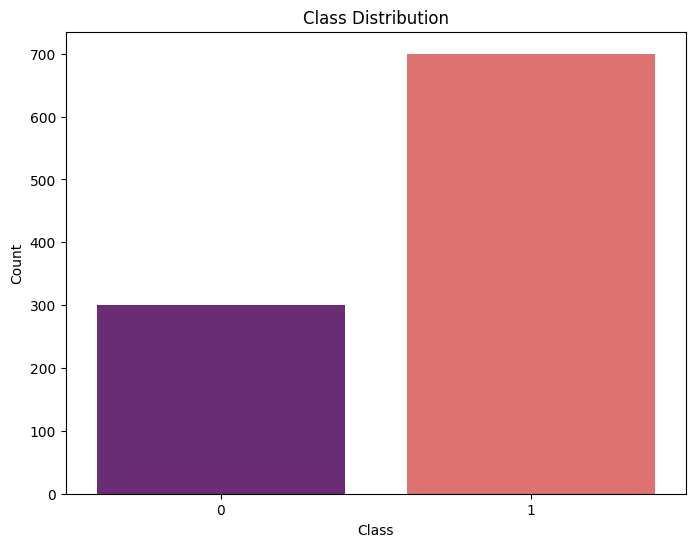

In [31]:
# Class distribution

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="class", data=cleaned2, ax=ax, palette='magma')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<b>Conclusion:</b></br>
We can see that our dataset is unbalanced, as the number of people classified as lower credit risk (good) is much higher than higher credit risk (bad).</br> This will be important in further analysis. For an imbalanced class dataset F1 score is a more appropriate metric. It is the harmonic mean of precision and recall.

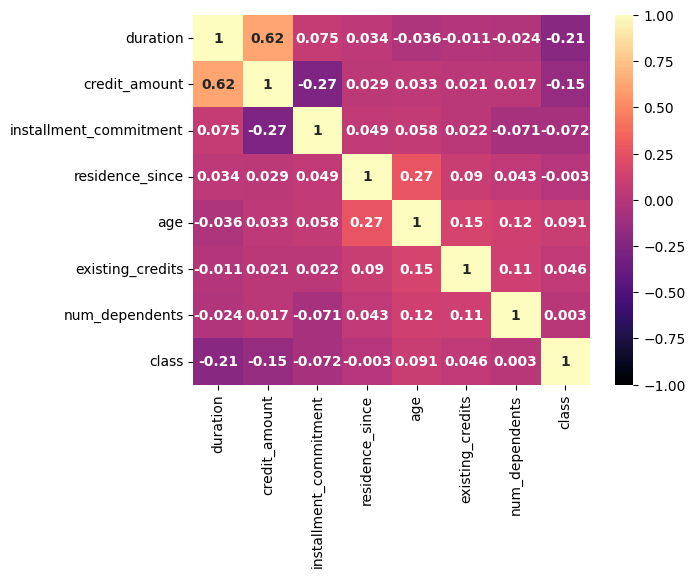

In [32]:
# Correlation

corr = cleaned.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap = "magma", annot_kws={'fontsize':10, 'fontweight':'bold'})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
pass

Conclusion:</br>
- The 'class' variable doesn't have a strong correlation with any of the other variables.</br>
- The strongest correlation is between 'credit_amount' and 'duration' (0.62).

## Histograms of numerical data

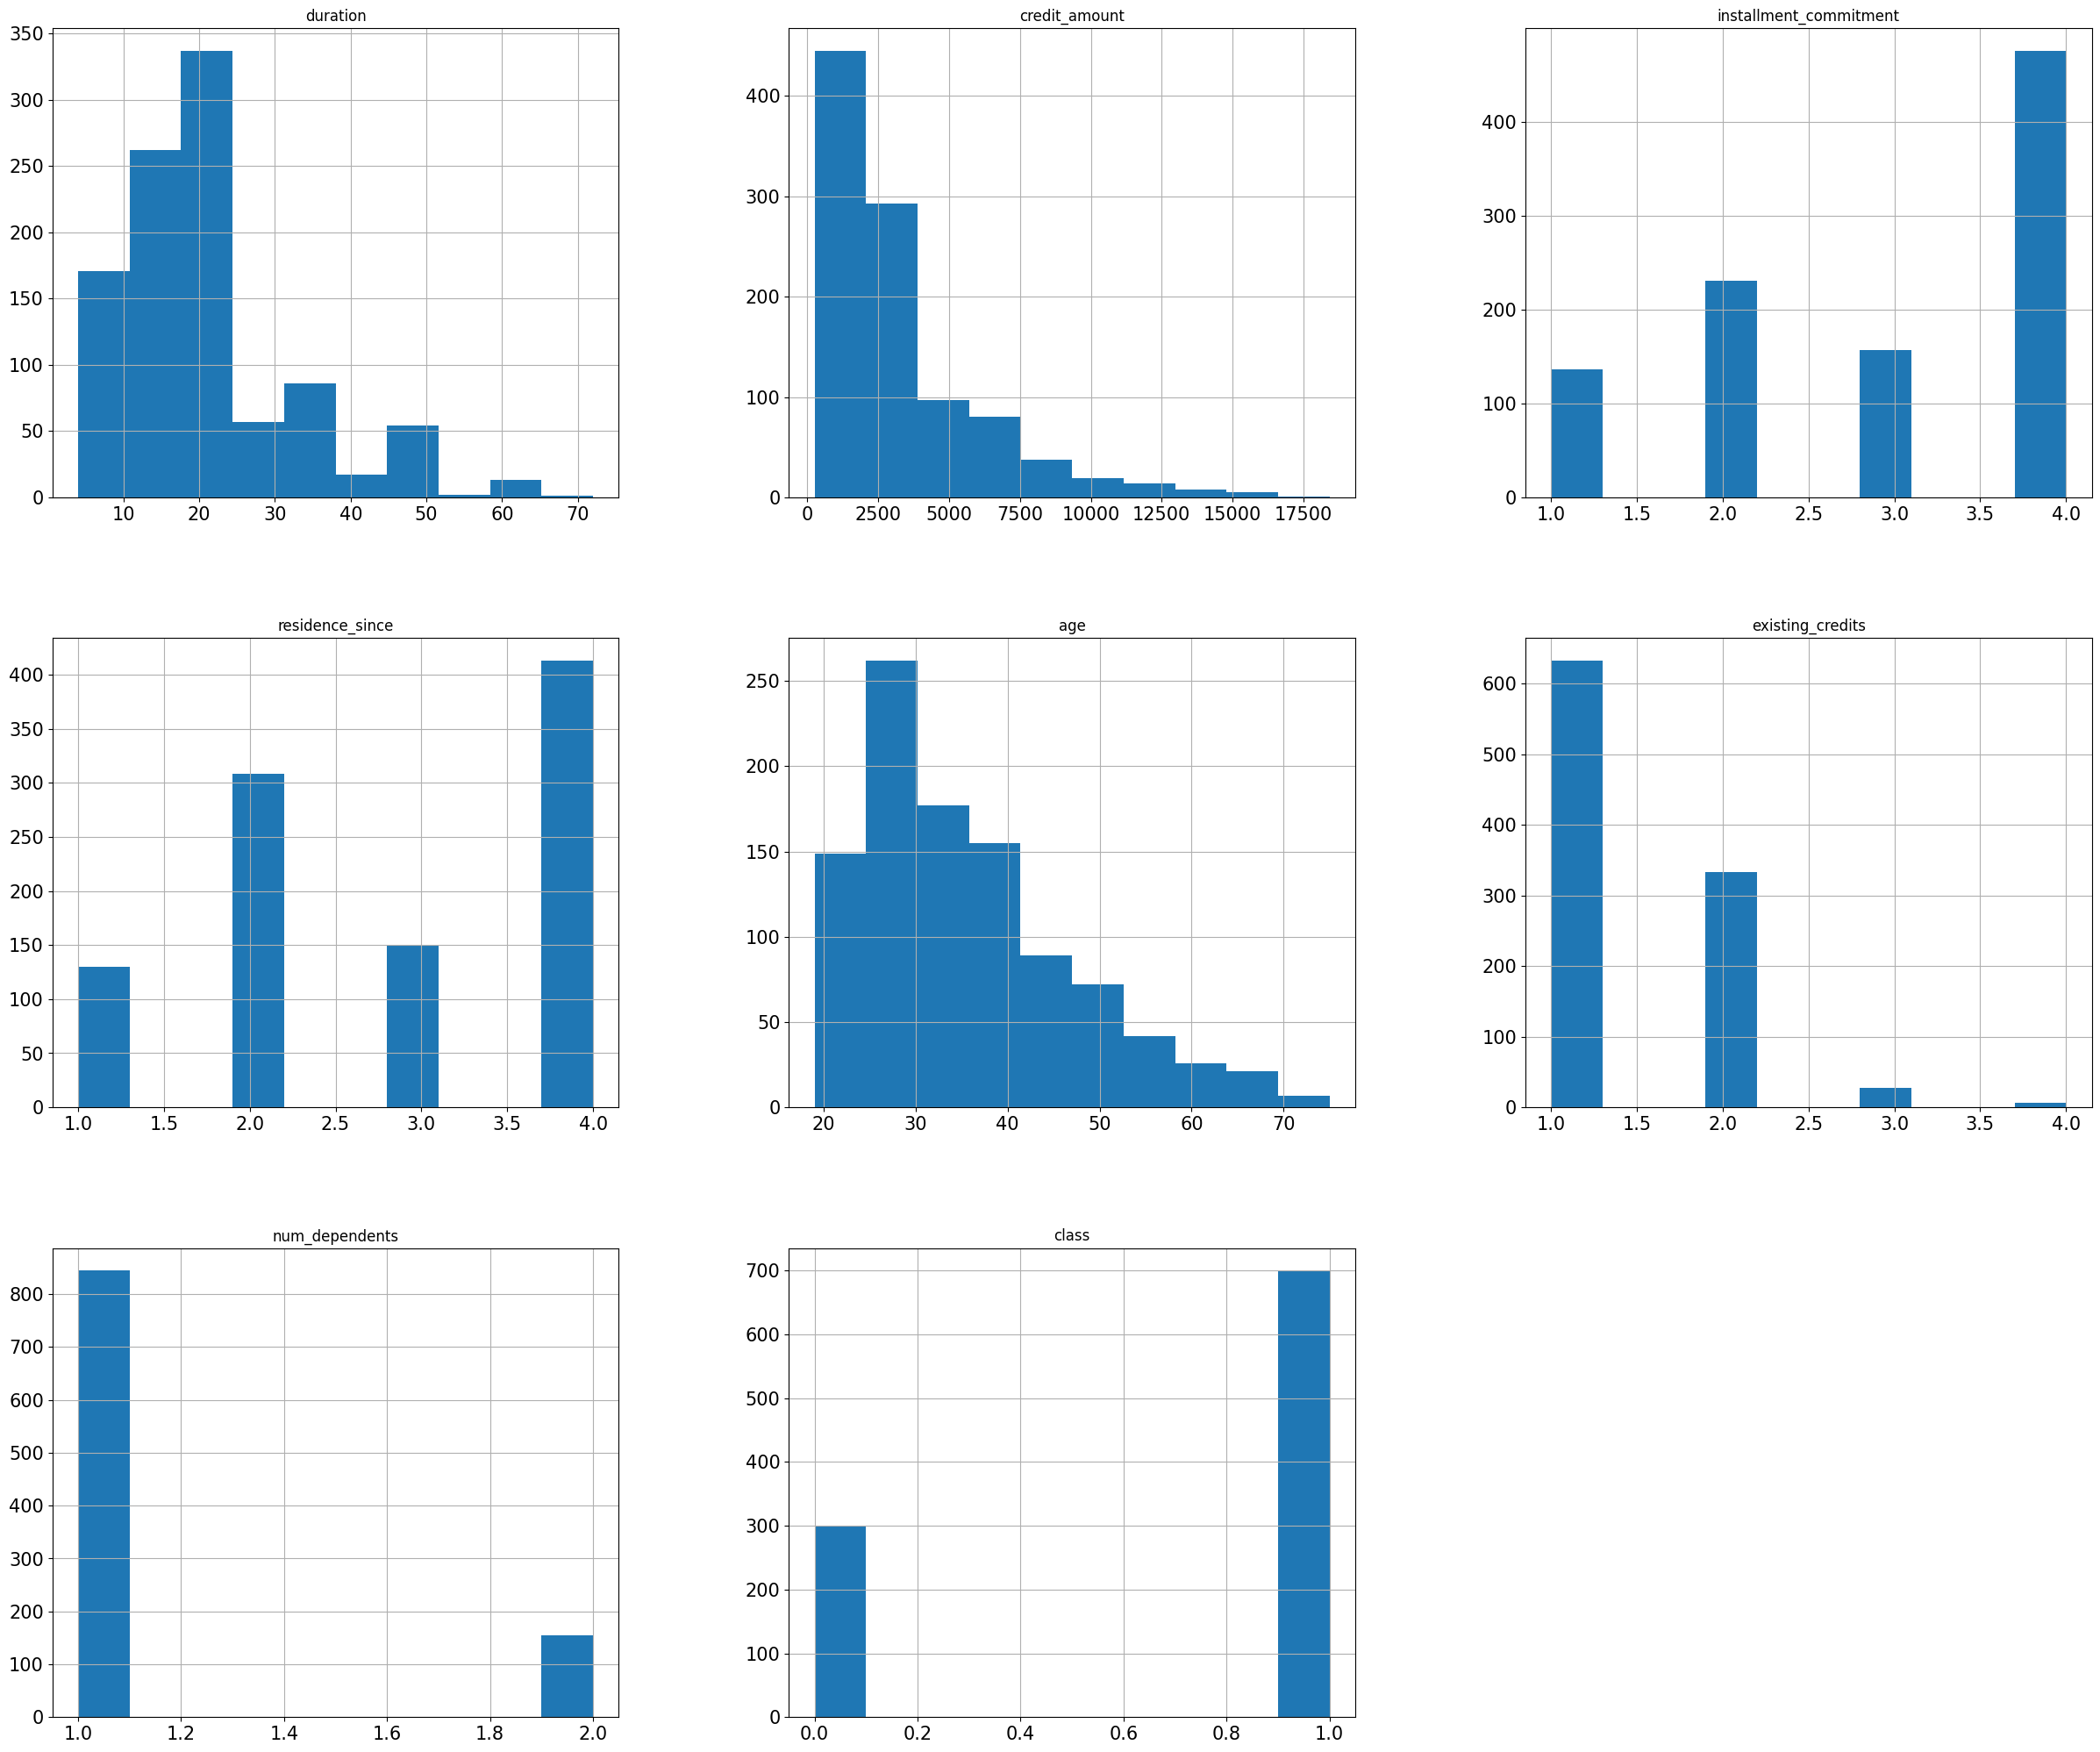

In [33]:
# Histograms of numerical data

cleaned.hist(bins=10, figsize=(30,25), ylabelsize=15, xlabelsize=15)
plt.show()

<b>Conclusion:</b><br>
- The biggest data spread is in the columns: duration, credit_amount, and age.<br>
- Data in the columns: installment_comitions, residence_since, existing_credits, num_dependents are divided into several categories.

## Histograms of categorical data

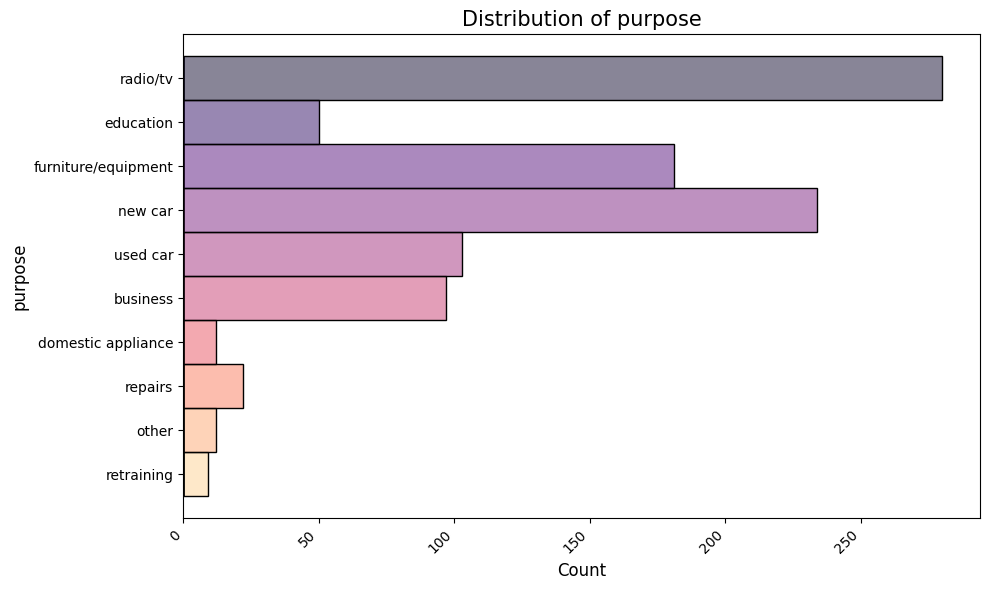

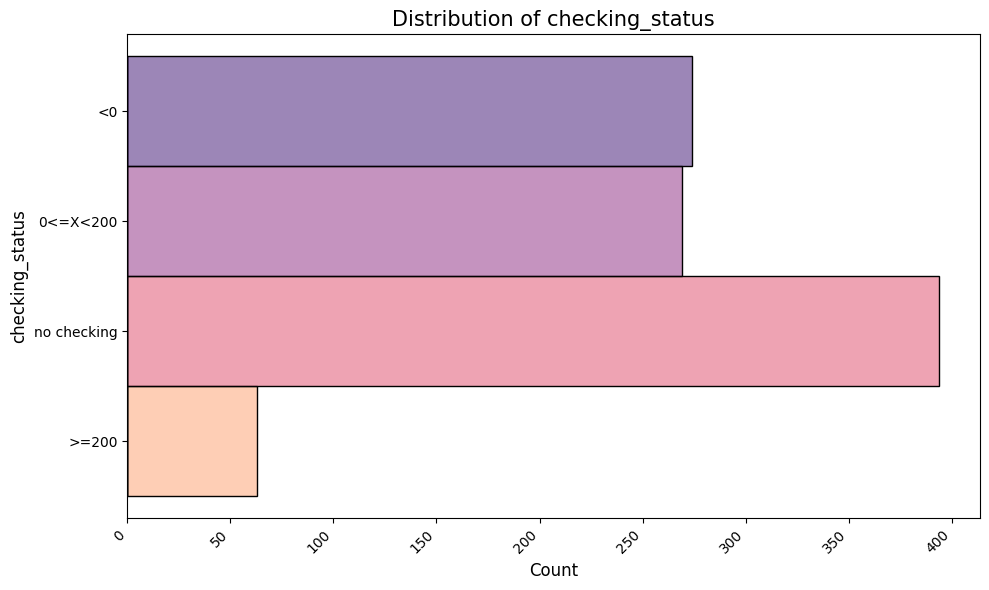

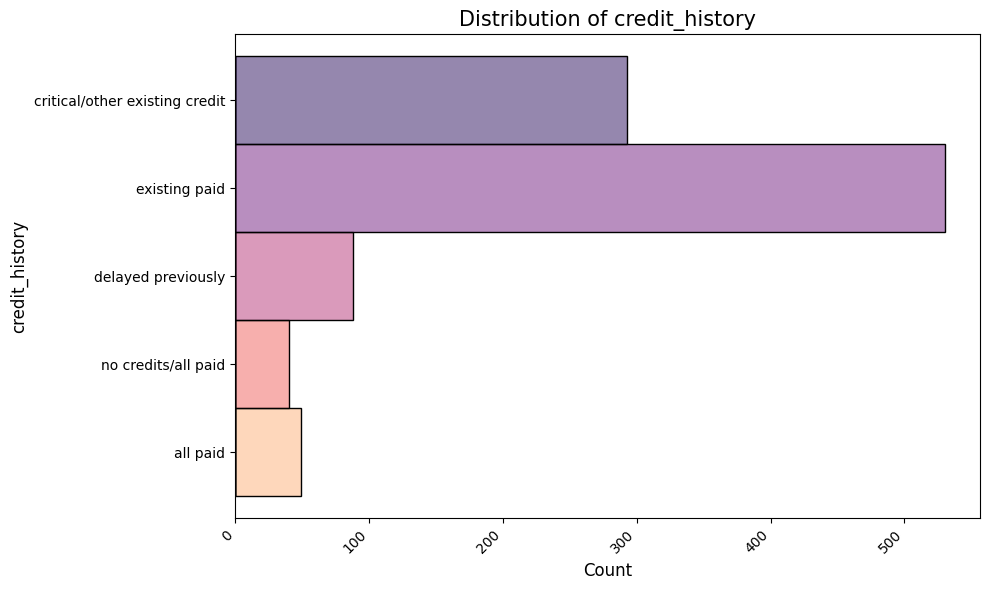

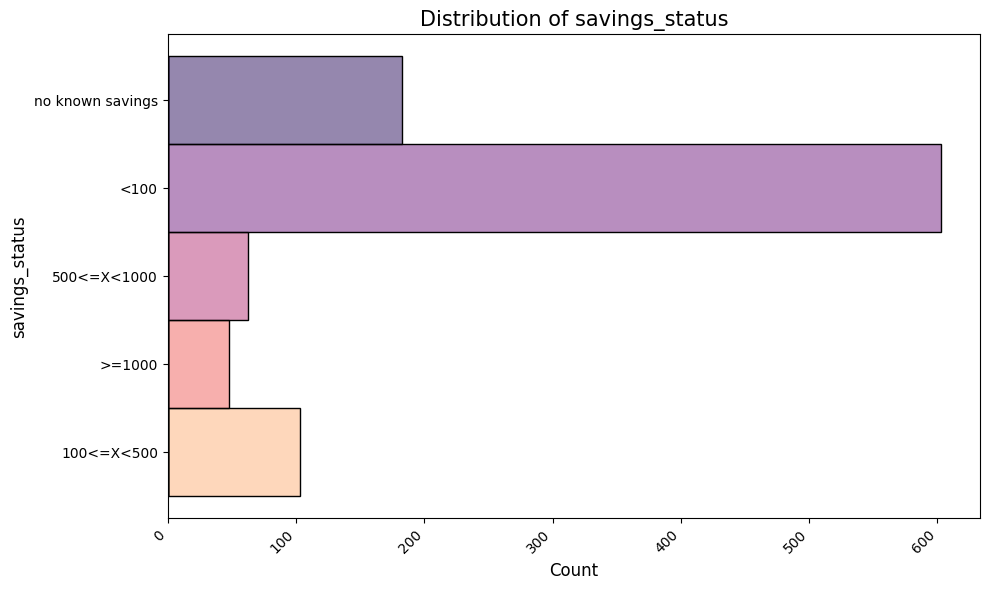

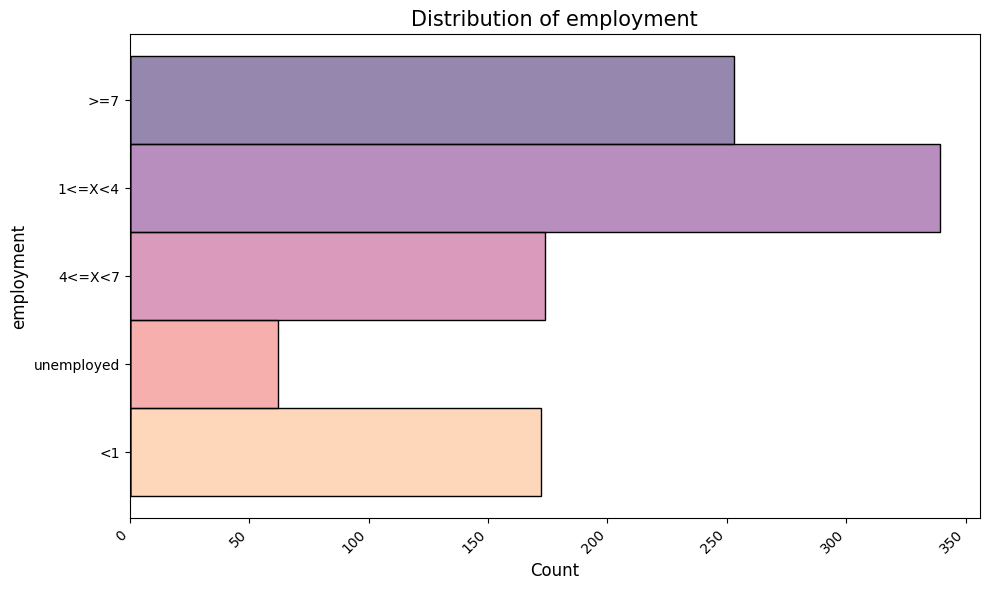

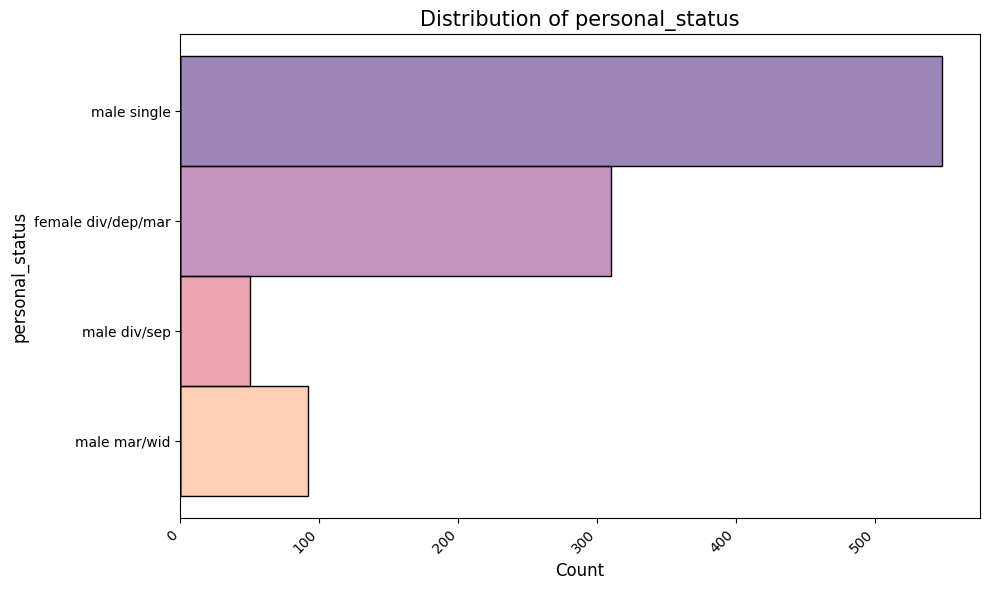

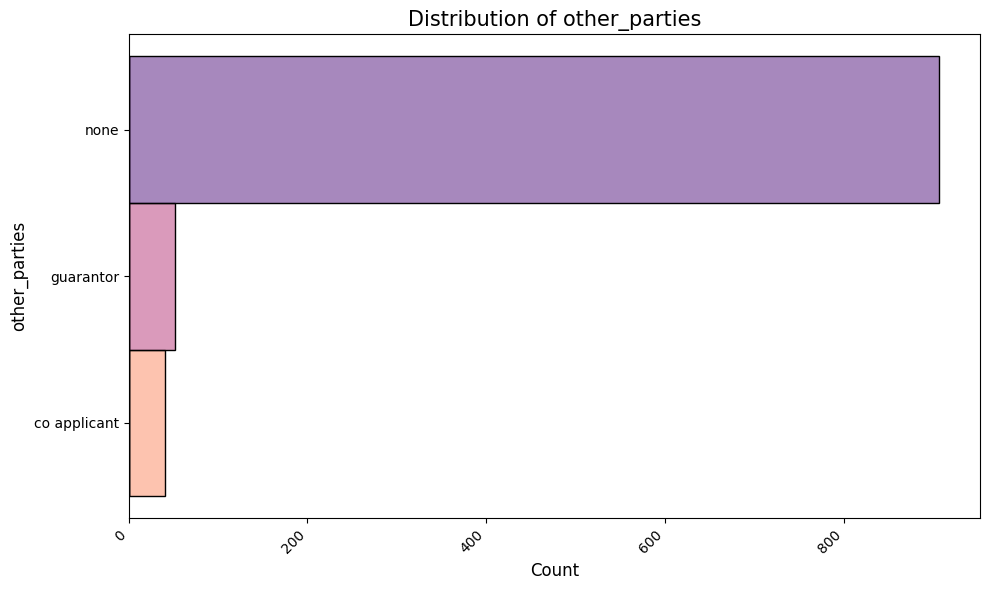

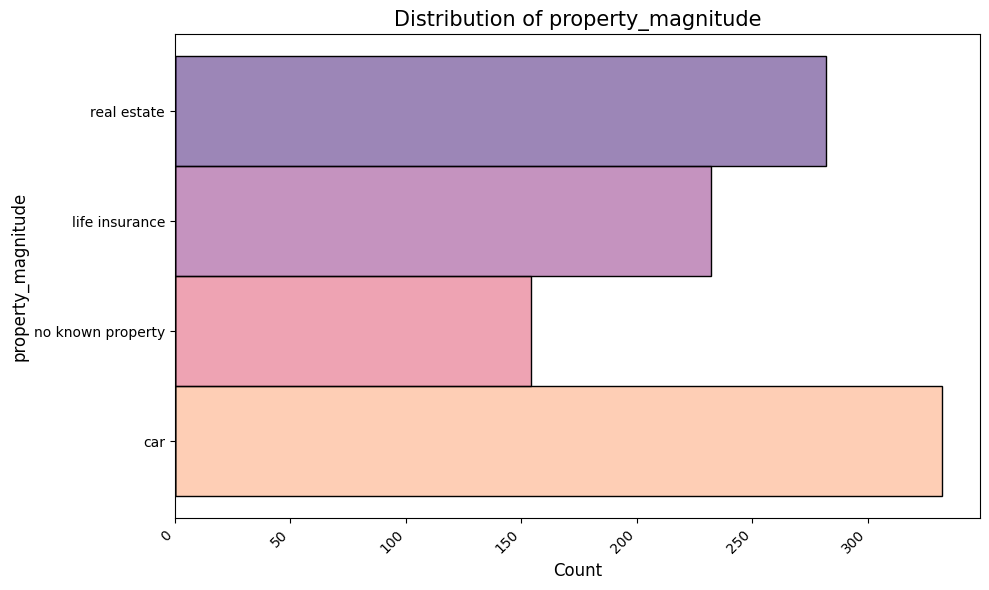

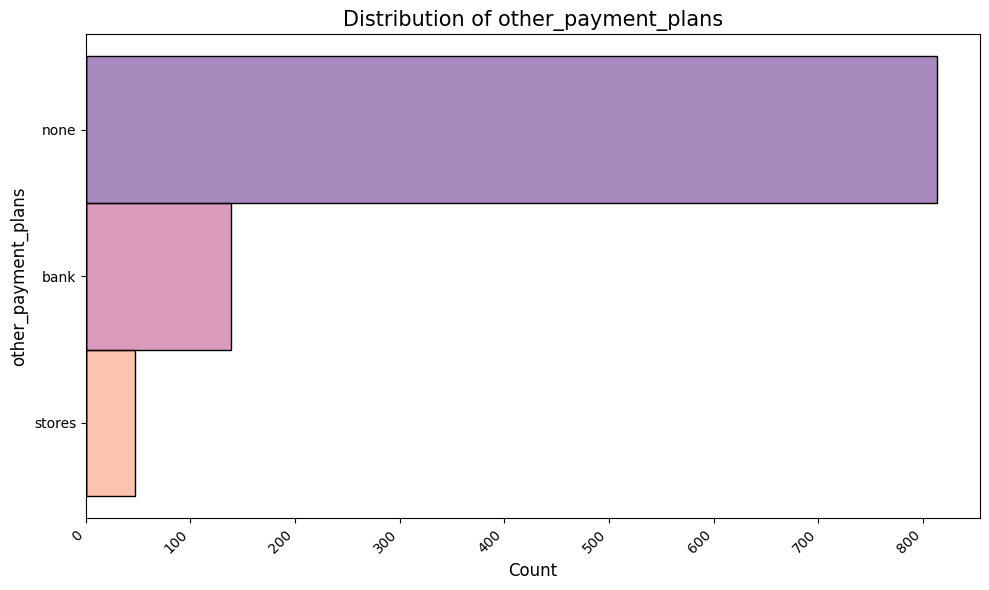

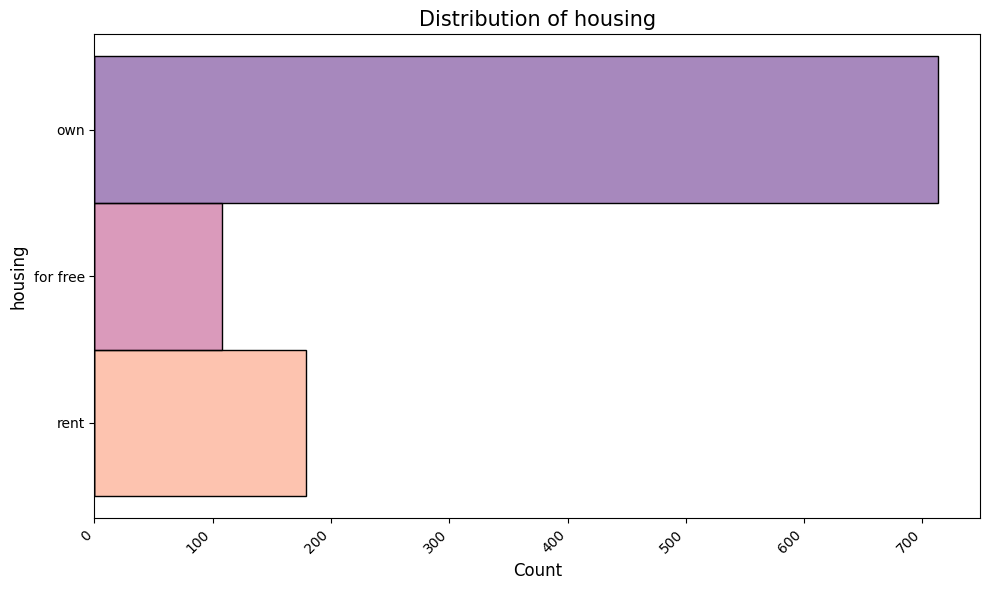

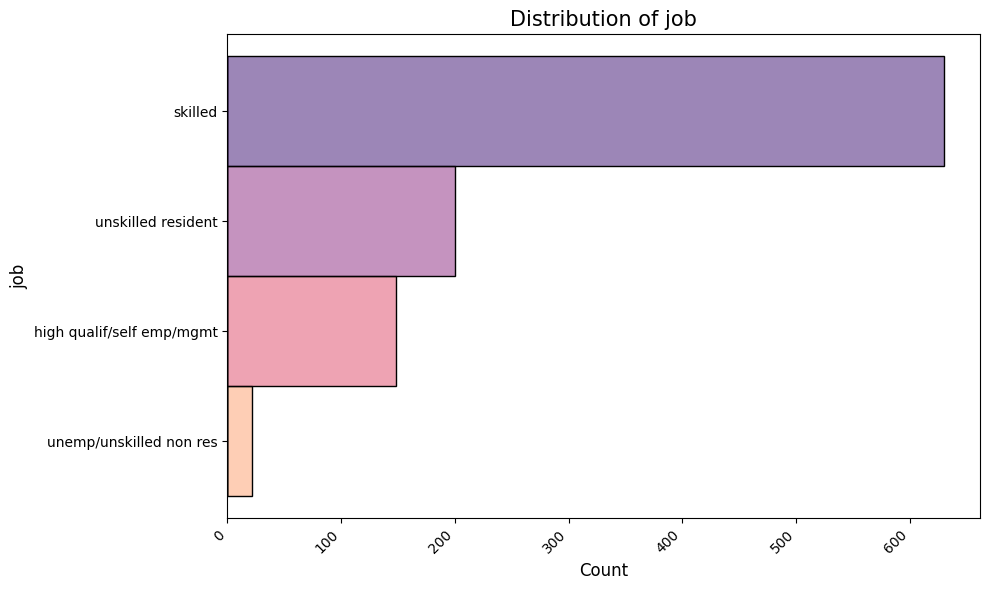

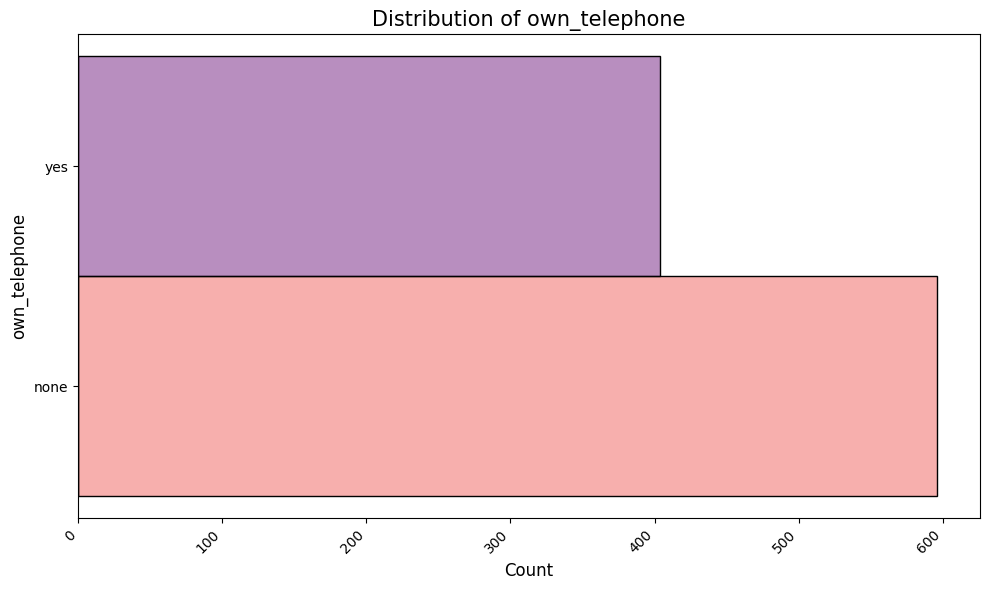

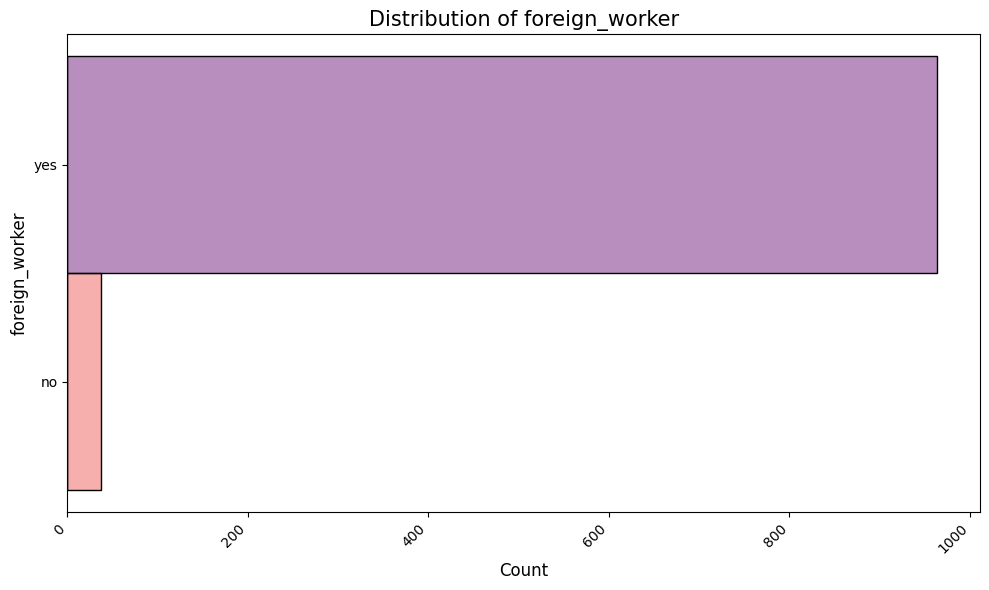

In [34]:
# Creating histograms for categorical data

var1 = ['purpose', 'checking_status', 'credit_history', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

for var in var1:

    plt.figure(figsize=(10,6)) 
    sns.histplot(y=var, data=cleaned, bins=10, kde=False, hue=var, palette='magma', legend=False)
    plt.xticks(rotation=45, ha="right", fontsize=10) 
    plt.yticks(fontsize=10) 
    plt.ylabel(f'{var}', fontsize=12) 
    plt.xlabel('Count', fontsize=12) 
    plt.title(f'Distribution of {var}', fontsize=15) 
    plt.tight_layout() 
    plt.show()

<b>Conclusion for purpose:</b><br>
The most common purposes among borrowers are radio/TV, new car, and furniture/equipment.<br>

<b>Conclusion for checking status:</b><br>
The most common checking status among borrowers is "no checking".<br>

<b>Conclusion for credit history:</b><br>
The most common credit history among borrowers is "existing paid".<br>

<b>Conclusion for savings status:</b><br>
The most common savings status among borrowers is "<100".<br>

<b>Conclusion for employment:</b><br>
The most common employment status among borrowers is "1<=x<4".<br>

<b>Conclusion for personal status:</b><br>
The most common personal status among borrowers is "male single".<br>

<b>Conclusion for other parties:</b><br>
The most common other parties involved among borrowers is "none".<br>

<b>Conclusion for other property magnitude:</b><br>
The most common property magnitude among borrowers is "car".<br>

<b>Conclusion for other payment plans:</b><br>
The most common other payment plans among borrowers is "none".<br>

<b>Conclusion for housing:</b><br>
The most common type of housing among borrowers is "own".<br>

<b>Conclusion for job:</b><br>
The most common job among borrowers is "skilled".<br>

<b>Conclusion for own telephone:</b><br>
The most common ownership status of telephone among borrowers is "none".<br>

<b>Conclusion for foreign worker:</b><br>
The most common foreign worker status among borrowers is "yes".<br>

The above conclusions can inform us about which individuals are most likely to receive a loan.

## Boxplots of numerical data

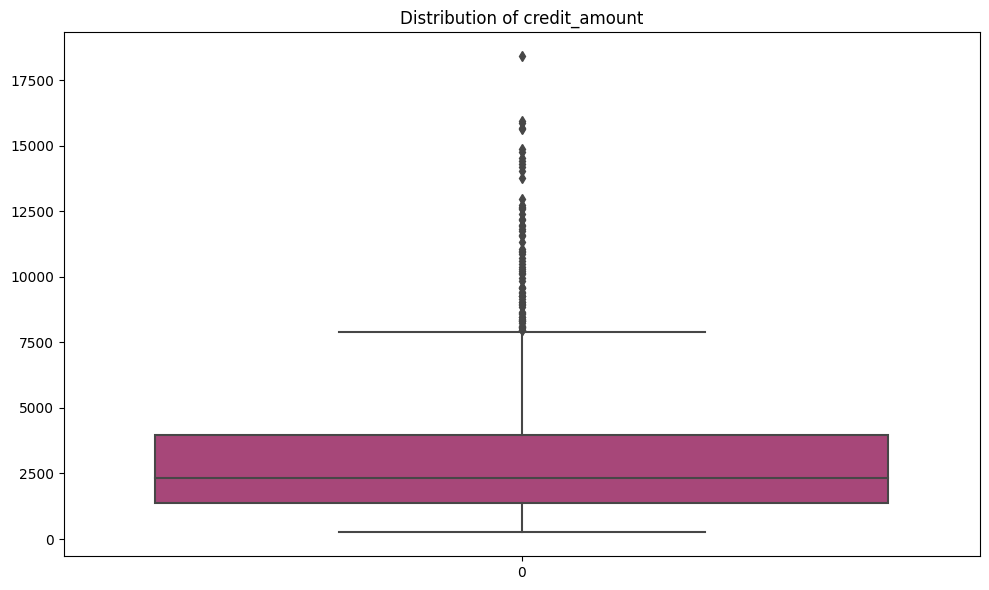

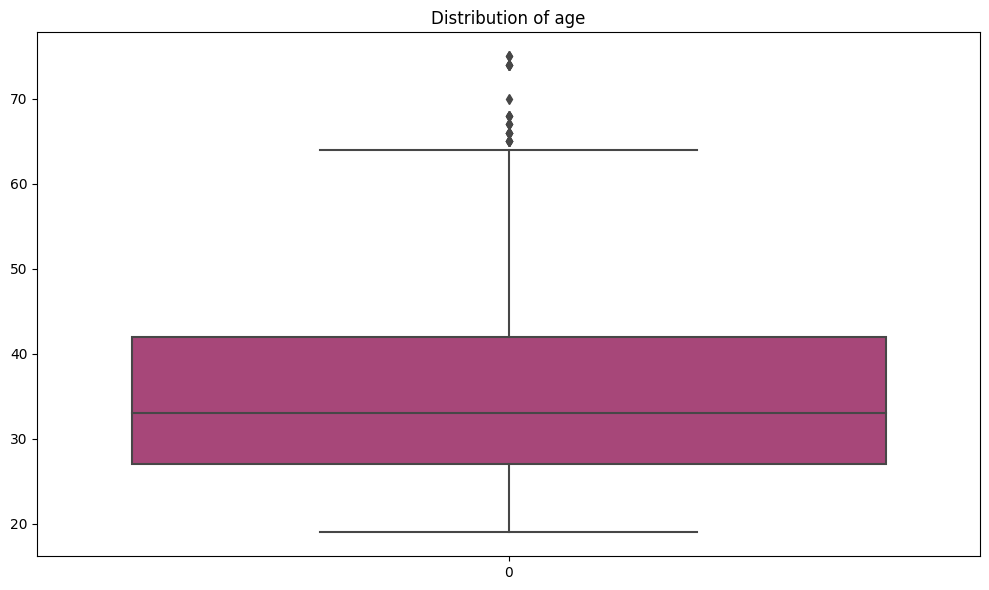

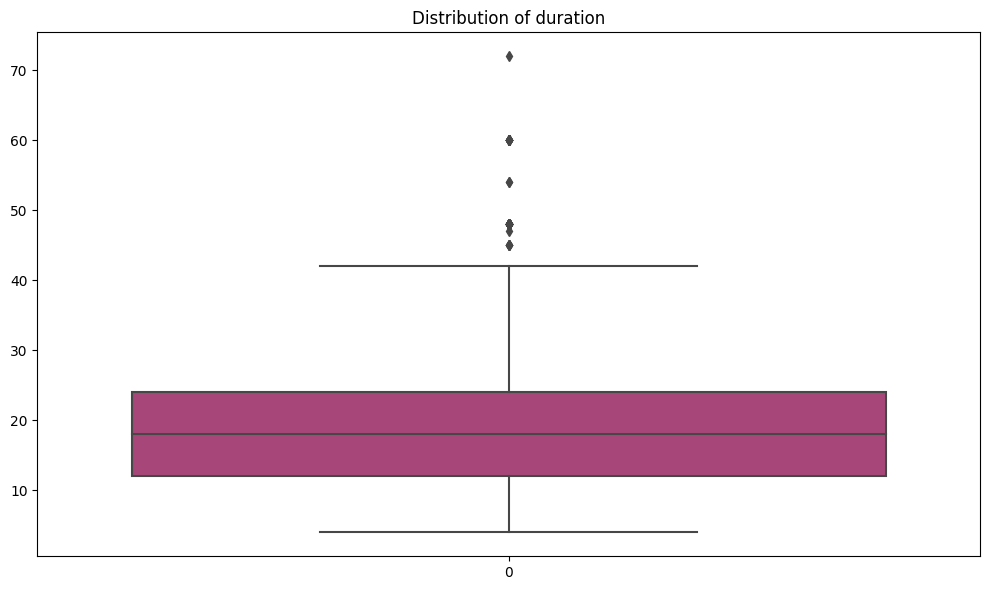

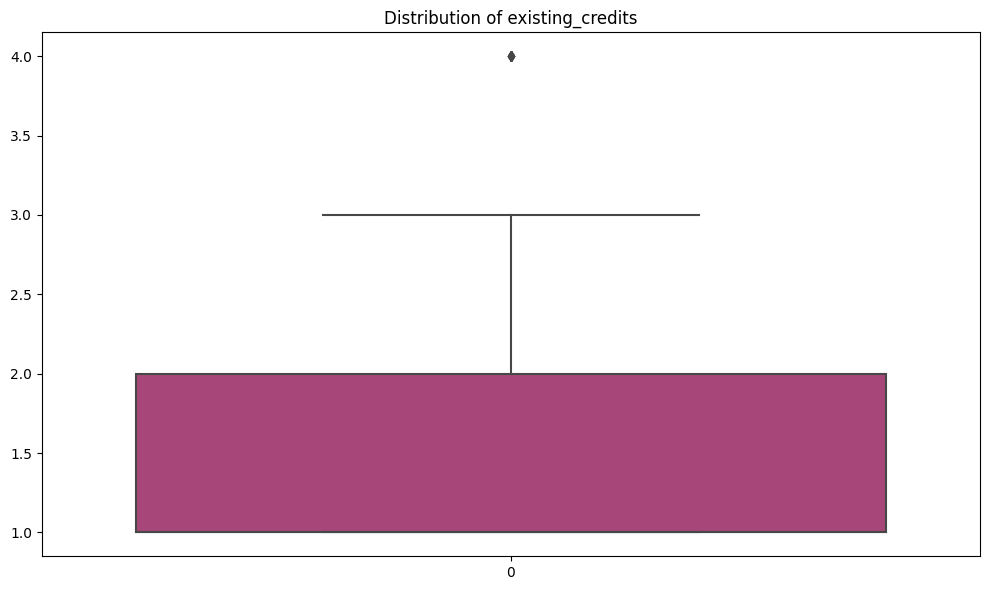

In [35]:
# Creating a boxplots for the variables: "credit_amount", "age", "duration"

var2 = ['credit_amount', 'age', 'duration', 'existing_credits']

for var in var2:
    plt.figure(figsize=(10, 6))
    sns.boxplot(cleaned[var], palette='magma')
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

<b>Conclusion for credit_amount:</b><br>
- The data shows a large number of outliers, but we cannot remove the outliers in this case because it would result in inaccurate data.<br>
- The most common loans are taken out for small amounts.<br>

<b>Conclusion for age:</b><br>
- We have outliers, but we cannot remove the outliers in this case because it would result in inaccurate data.<br>
- The most common borrowers of loans are people between 30 and 40 years old.<br>

<b>Conclusion for duration:</b><br>
- We have outliers, but we cannot remove the outliers in this case because it would result in inaccurate data.<br>
- The most common loan duration is 15-25 years.<br>

<b>Conclusion for existing_credits:</b><br>
- We have almost no outliers.<br>
- The most common number of existing loans among borrowers is 1-2.

## Boxplots of categorical data with an additional dependent variable 

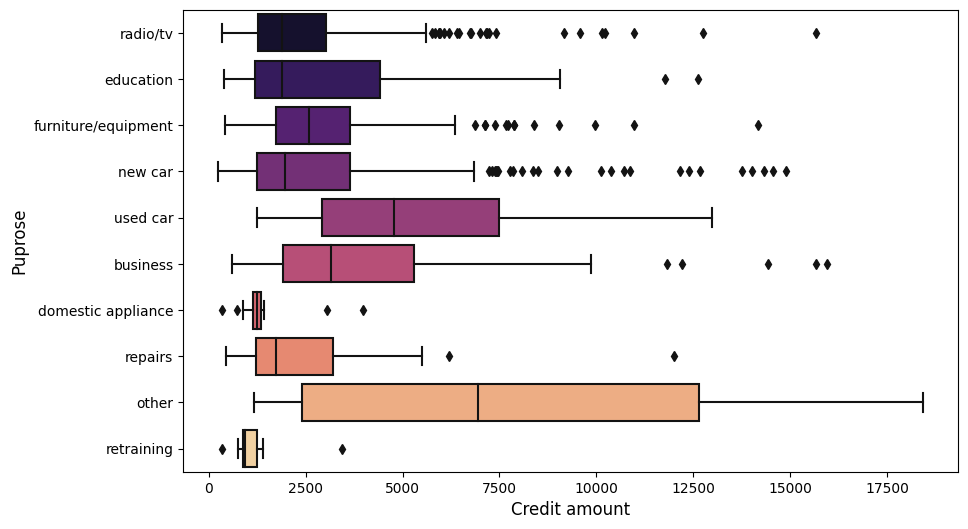

In [36]:
# Creating a boxplot with credit amount and purpose 

plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_amount', y='purpose', data=cleaned, palette='magma')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10) 
plt.ylabel('Puprose', fontsize=12)
plt.xlabel('Credit amount', fontsize=12) 
plt.show()

<b>Conclusion:</b><br>
- The largest differencies in loan amount are for the purpose of "other" and "used cars"..<br>
- The smallest credit amount ranges are for the purposes: domestic appliance and retraining.

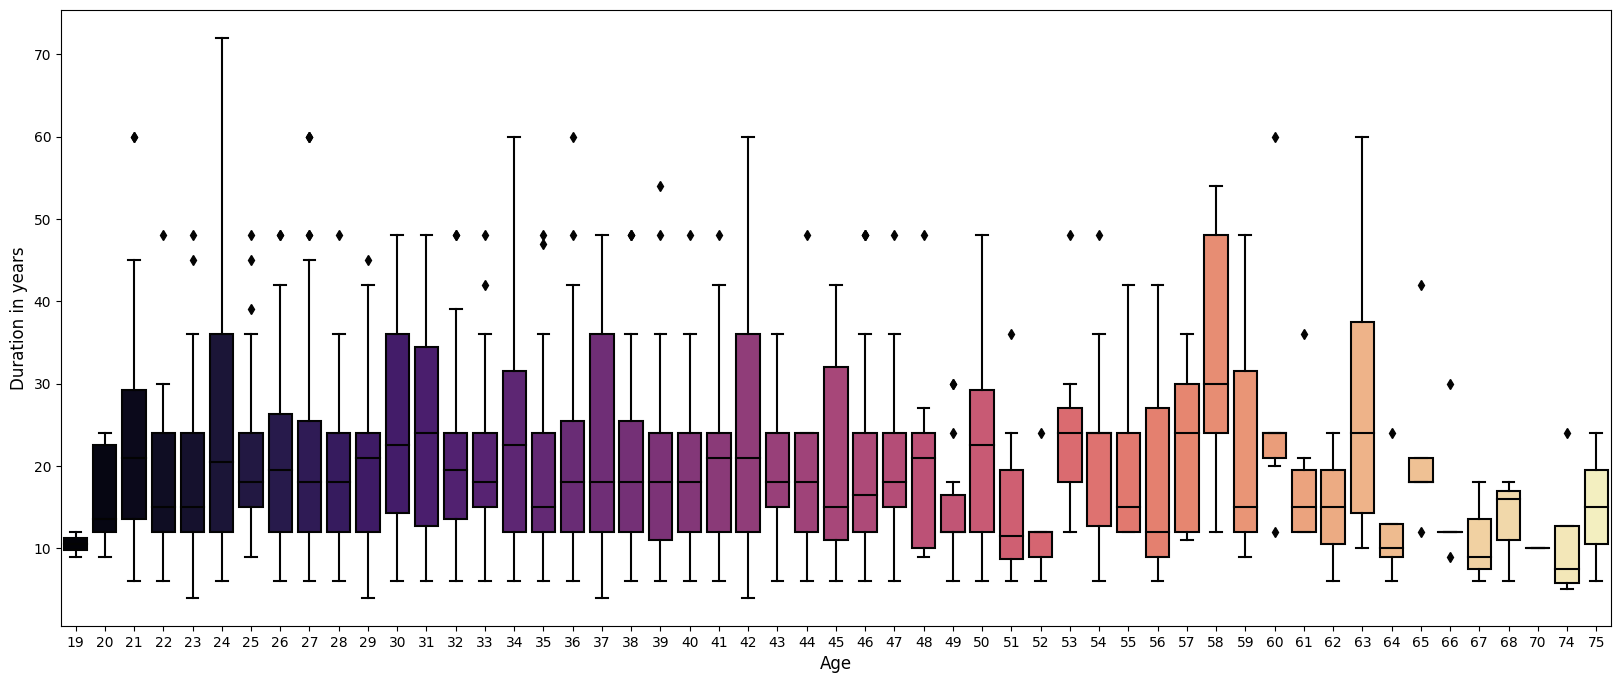

In [37]:
# Creating a boxplot with duration and age

plt.figure(figsize=(20, 8))
sns.boxplot(x='age', y='duration', data=cleaned, palette='magma')
plt.yticks(fontsize=10) 
plt.xticks(fontsize=10) 
plt.ylabel('Duration in years', fontsize=12) 
plt.xlabel('Age', fontsize=12) 
plt.show()

<b>Conclusion:</b><br>
- The largest variations in loan duration can be observed for individuals between the ages of 50 and 75.<br>
- Individuals up to the age of 50 most often take out loans in the range of 15-35 years.

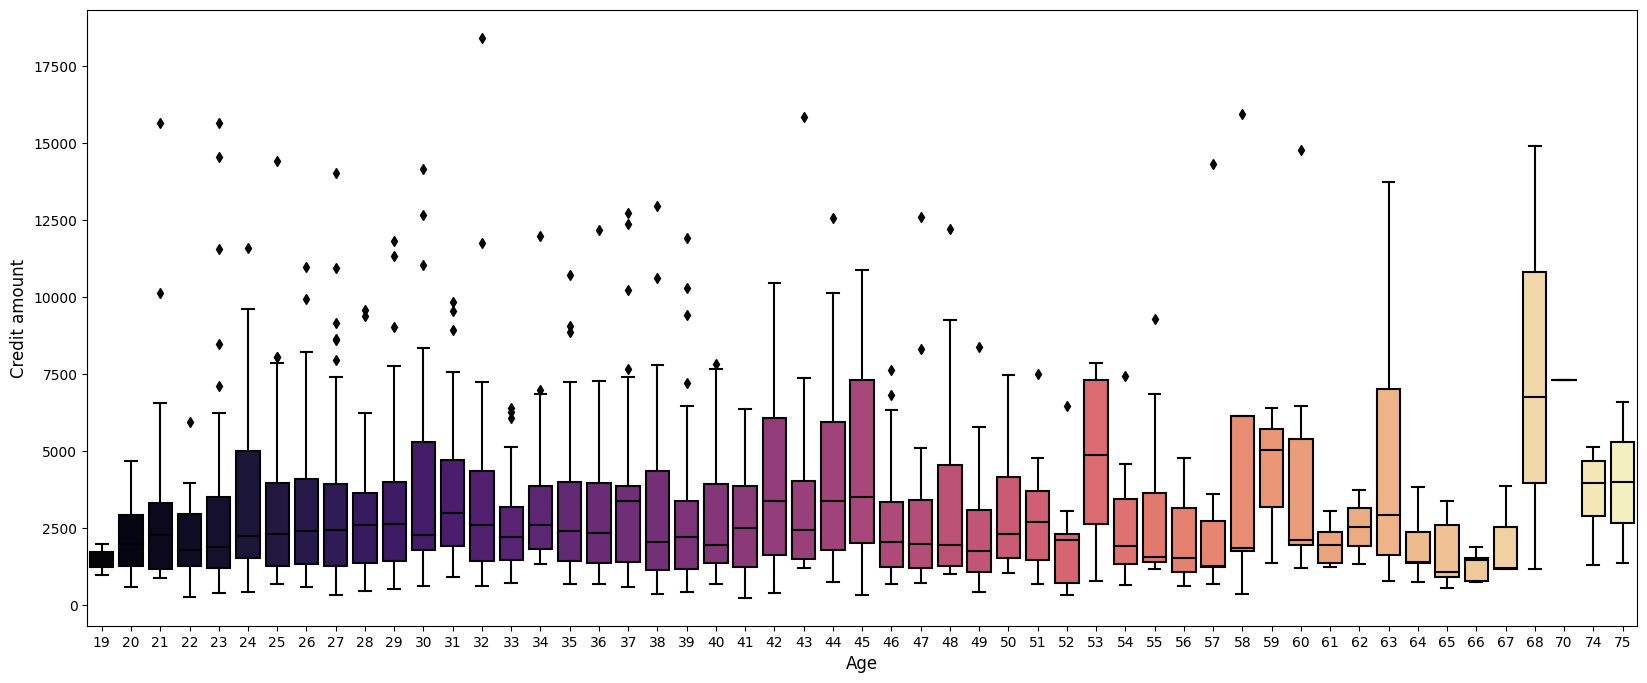

In [38]:
# Creating a boxplot with credit amount and age 

plt.figure(figsize=(20, 8))
sns.boxplot(x='age', y='credit_amount', data=cleaned, palette='magma')
plt.yticks(fontsize=10) 
plt.xticks(fontsize=10) 
plt.ylabel('Credit amount', fontsize=12)
plt.xlabel('Age', fontsize=12) 
plt.show()

<b>Conclusion:</b><br>
- Individuals up to the age of 40 most often take out loans up to 5000.<b>
- From the age of 40 larger varriances in data appear.

# Multivariate Analysis

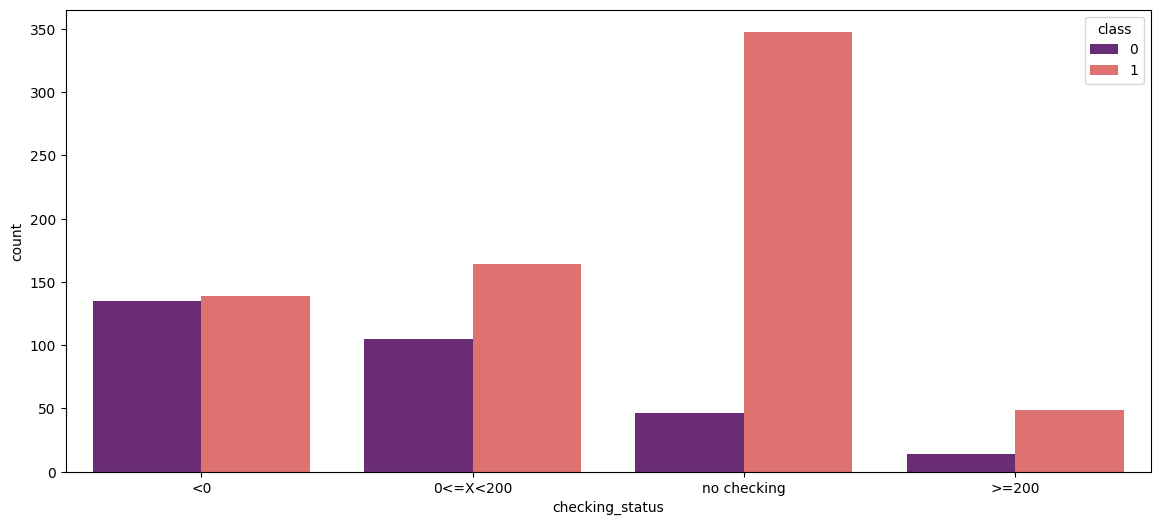

In [39]:
# The distribution of the variable 'checking_status' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='checking_status', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion: </br>
- Individuals who have very low funds in their account ('<0') have a significantly higher chance of defaulting on the credit.</br>
- Individuals who do not have a bank account (variable 'checking_status' == 'no checking') have the highest chance of repaying the loan.

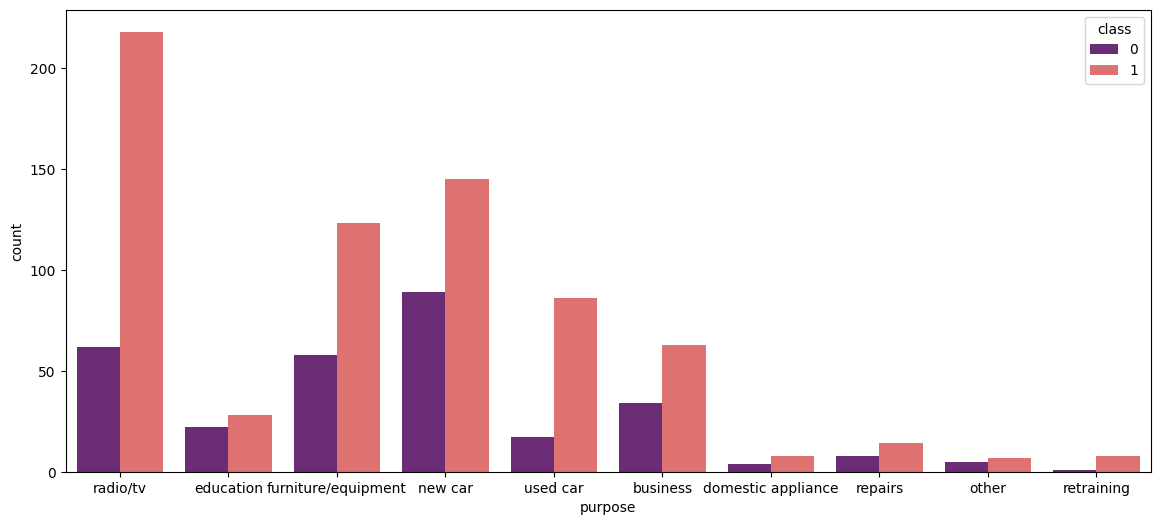

In [40]:
# The distribution of the variable 'purpose' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='purpose', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion: </br>
- The highest chance of loan repayment is for the purchases of: radio/tv and used car.

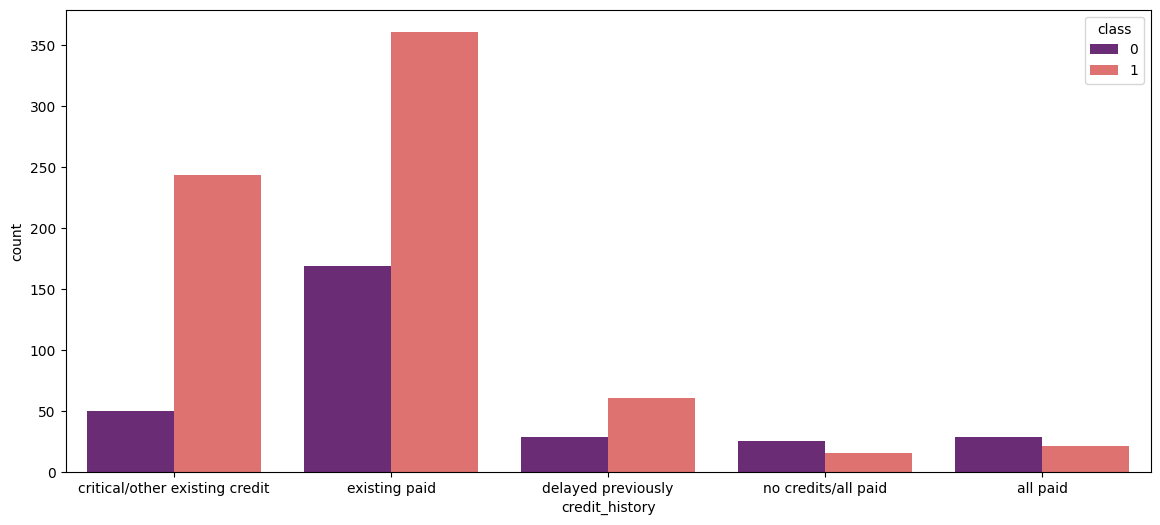

In [41]:
# The distribution of the variable 'credit_history' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='credit_history', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conslusion:</br>
- People with a credit history of 'critical/other existing credit' have a greater chance of repaying the loan

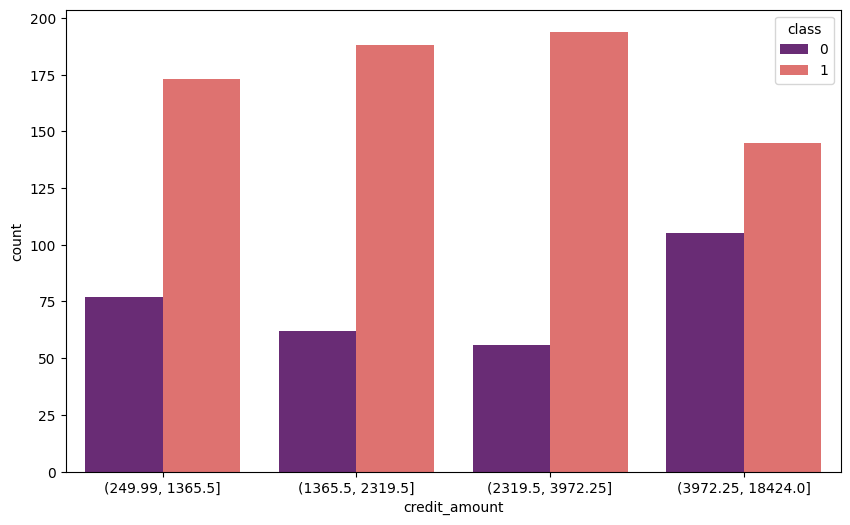

In [42]:
# Dividing into 4 baskets
cleaned['credit_amount'] = cleaned['credit_amount'].astype(int)
bins = pd.qcut(cleaned['credit_amount'], 4, precision=2) #Dividing the data into 4 quartiles results in a better distribution of the data with an equal number of elements

#The distribution of the variable 'credit_amount' based on the variable 'class'
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=bins, hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

pd.options.mode.chained_assignment = None  # ignoring warning

Conclusion:</br>
- The highest loan amount has the greatest risk of loan approval.

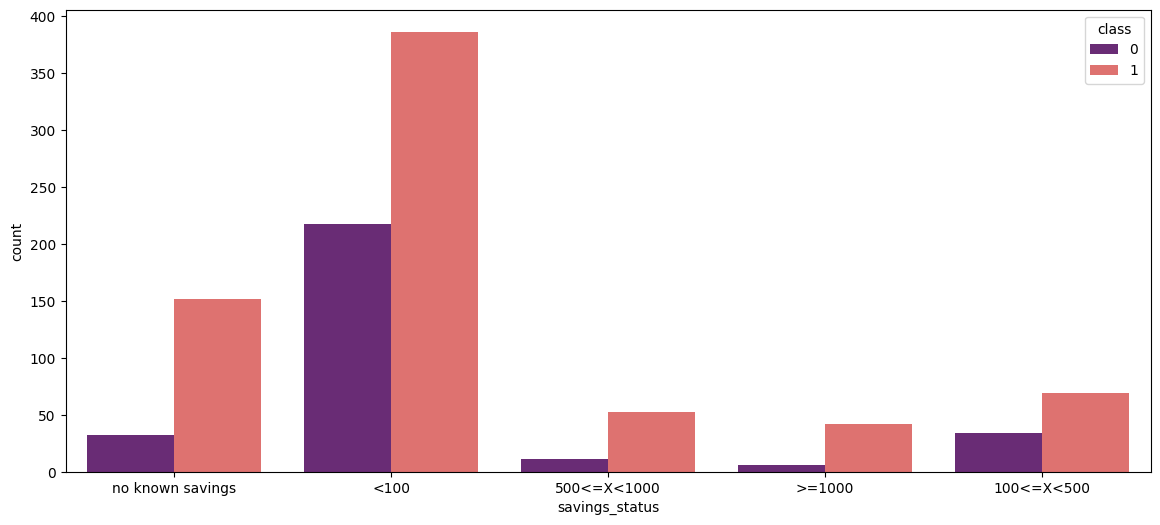

In [43]:
#The distribution of the variable 'savings_status' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='savings_status', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion:</br>
- The greatest risk of loan approval is associated with savings_status < 100

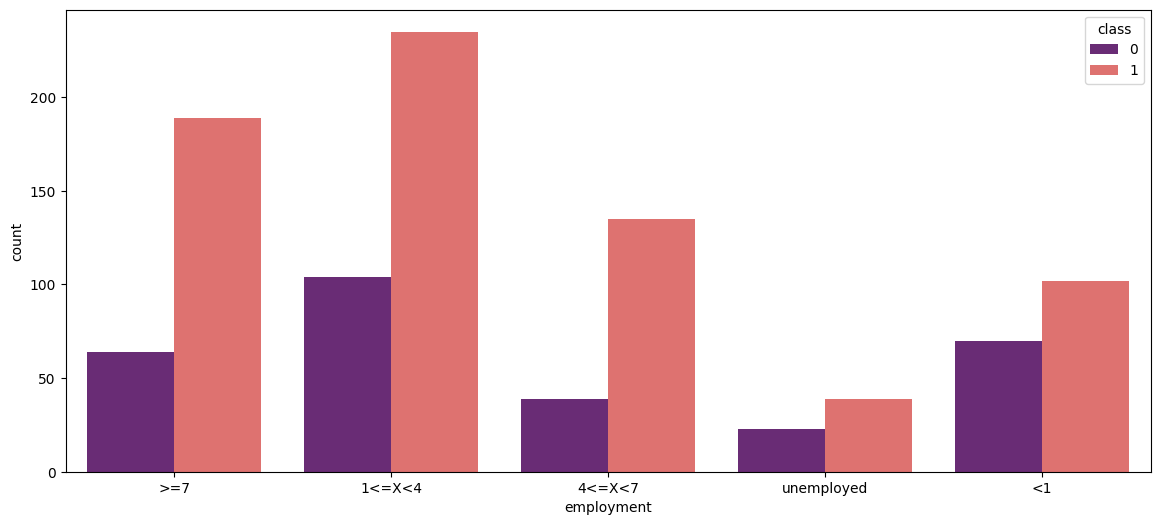

In [44]:
#The distribution of the variable 'employment' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='employment', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b></br>
The lowest risk of loan approval is associated with employment status: 4<=X<7,  1<=X<4m >=7

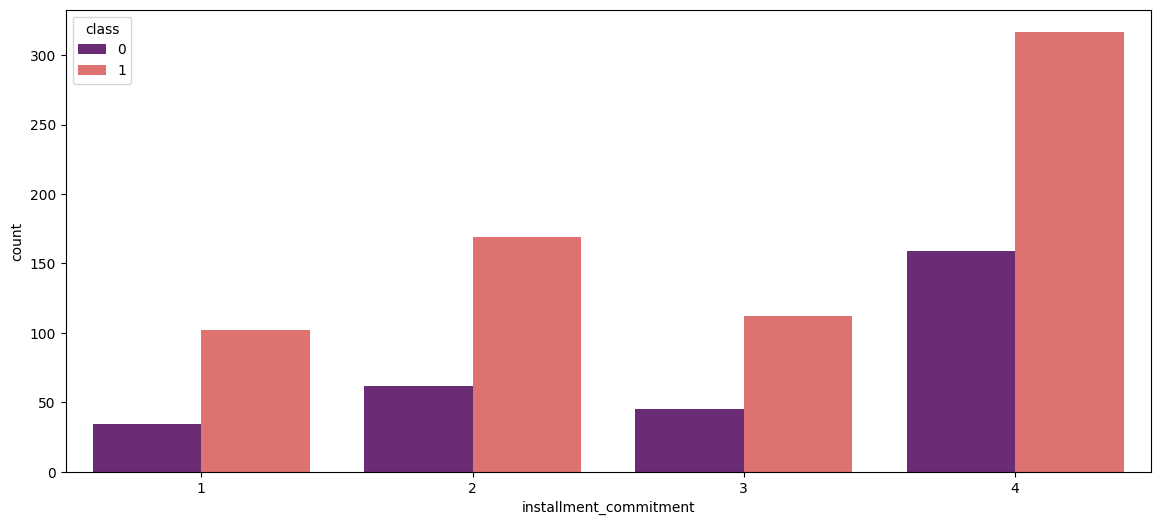

In [45]:
#The distribution of the variable 'installment_commitment' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='installment_commitment', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b>
</br>
The higher the installment commitment is, the lower the credit risk

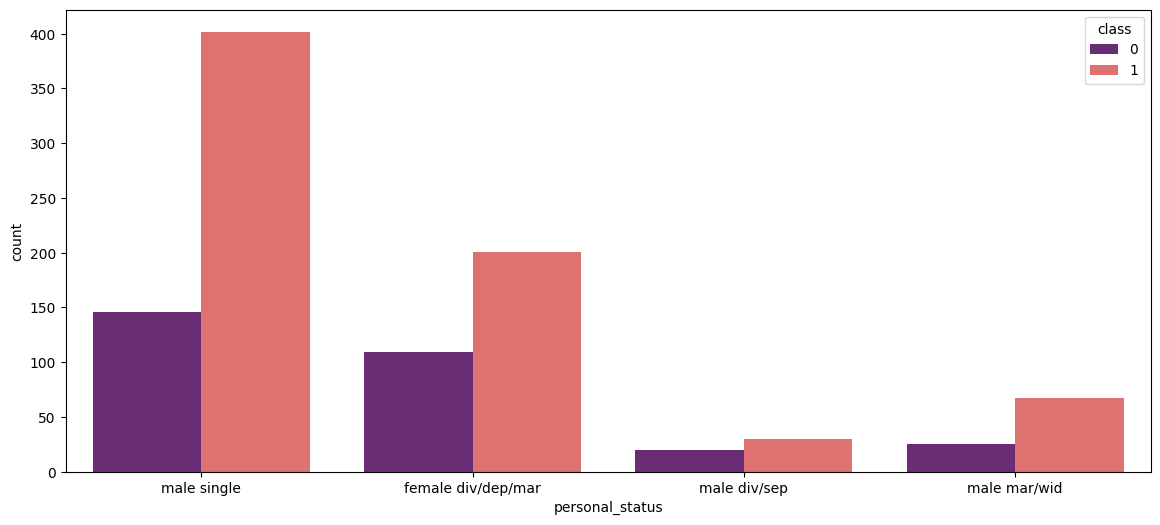

In [46]:
#The distribution of the variable 'personal_status' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='personal_status', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion:</br>
- The lowest credit risk is for the group of male single

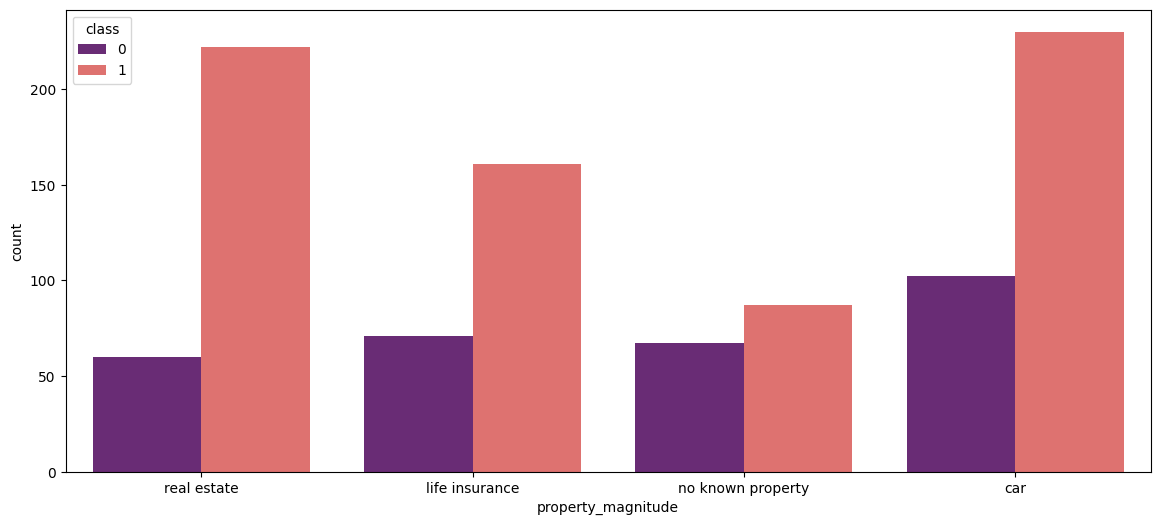

In [47]:
#The distribution of the variable 'property_magnitude' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='property_magnitude', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Concluion:</b><br>
- Good credit borrowers are usually individuals with a  property magnitude, such as real estate or a car.

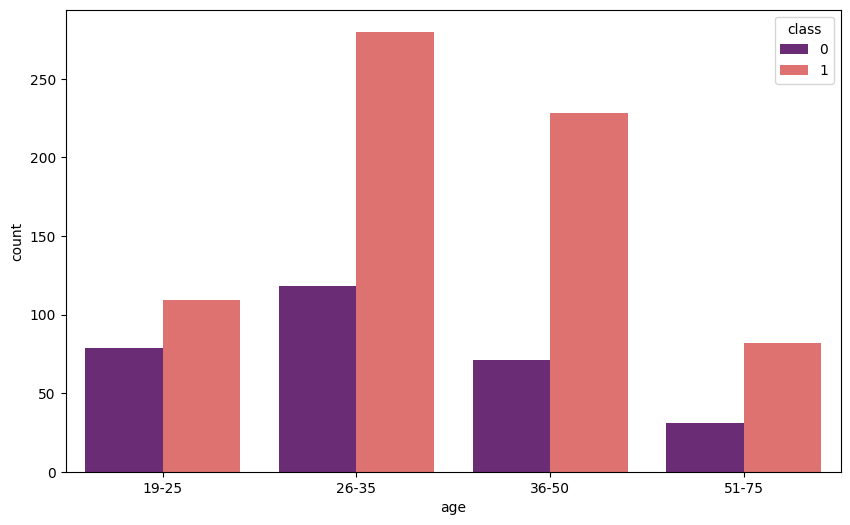

In [48]:
#The distribution of the variable 'age' based on the variable 'class'

cleaned['age'] = cleaned['age'].astype(int)

bins= [19,25,35,50,75]
labels = ['19-25', '26-35', '36-50', '51-75']

bins = pd.cut(cleaned['age'], bins=bins, labels=labels, right=True) #dzieli dane na 4 kwartyle, lepiej wyglada wtedy rozklad danych, ta sama liczba elementow

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=bins, hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

pd.options.mode.chained_assignment = None  # ignoring warning

<b>Conclusion:</b><br>
- Good credit borrowers tend to be 26-35 year olds and 36-50 year olds

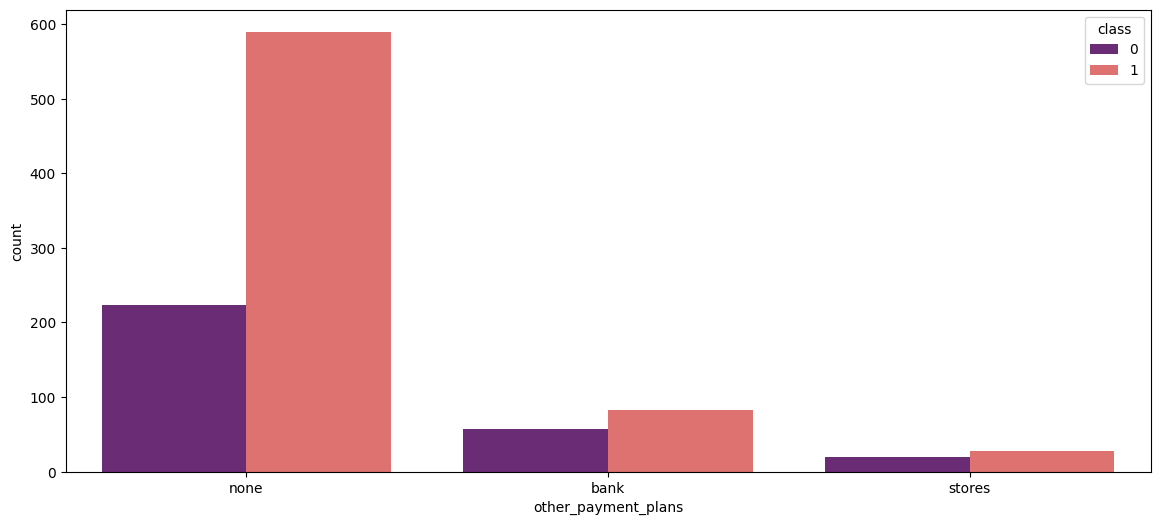

In [49]:
#The distribution of the variable 'other_payment_plans' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='other_payment_plans', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b><br>
- Good credit borrowers are usually those with other_payment_plans as 'none'

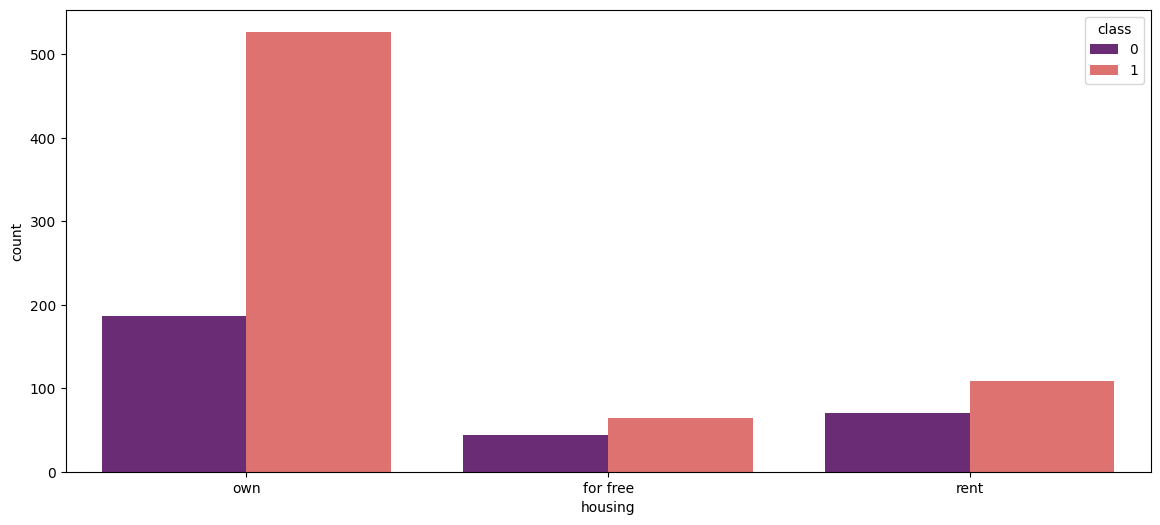

In [50]:
#The distribution of the variable 'housing' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='housing', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b><br>
- Good borrowers are usually people who own a house

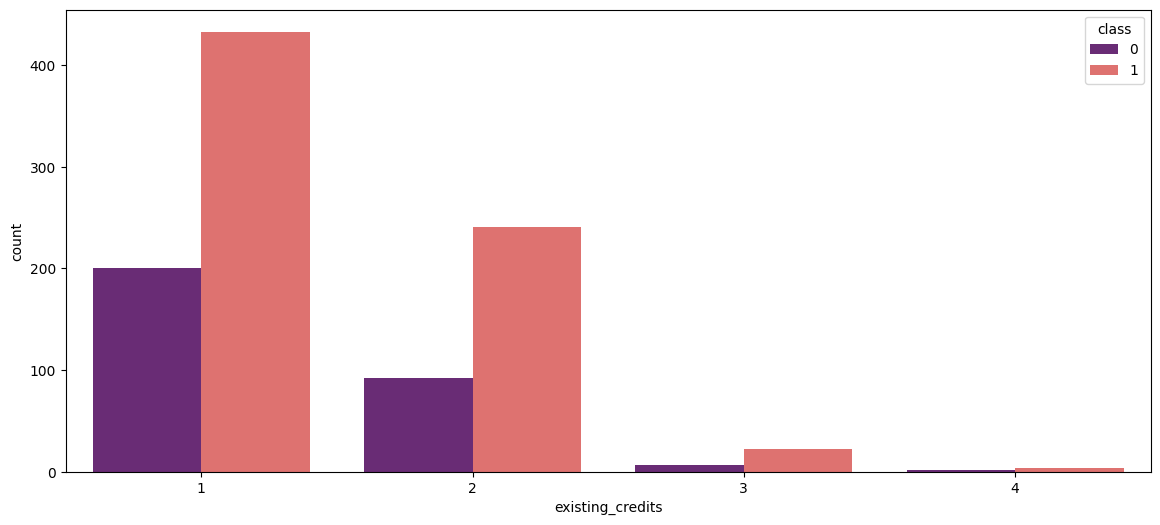

In [51]:
#The distribution of the variable 'existing_credits' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='existing_credits', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:<b><br>
- Good credit borrowers are usually people who have 1-2 loans with this bank

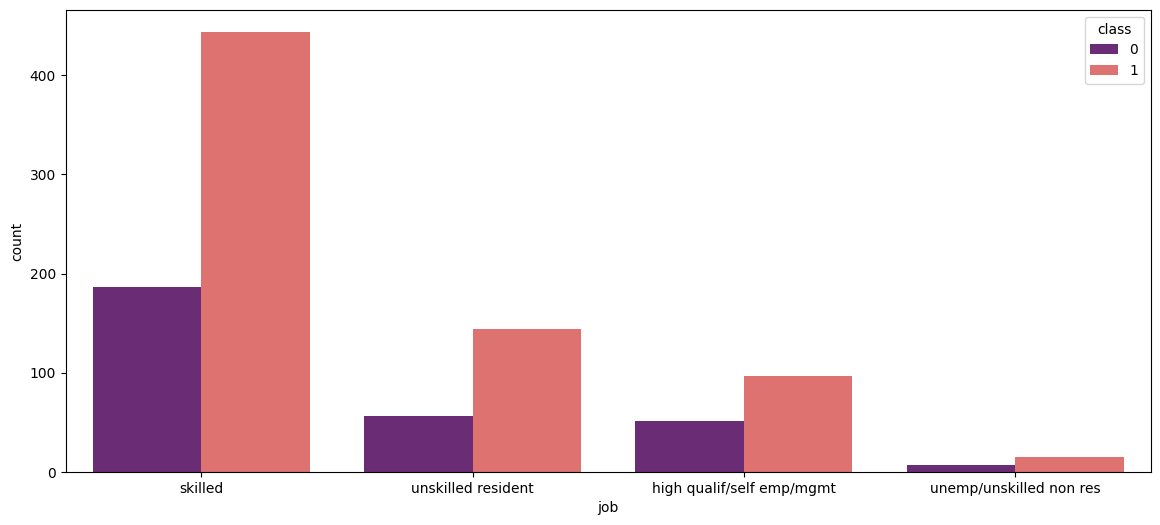

In [52]:
#The distribution of the variable 'job' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='job', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion</b><br>
- Skilled employees are usually good credit borrowers

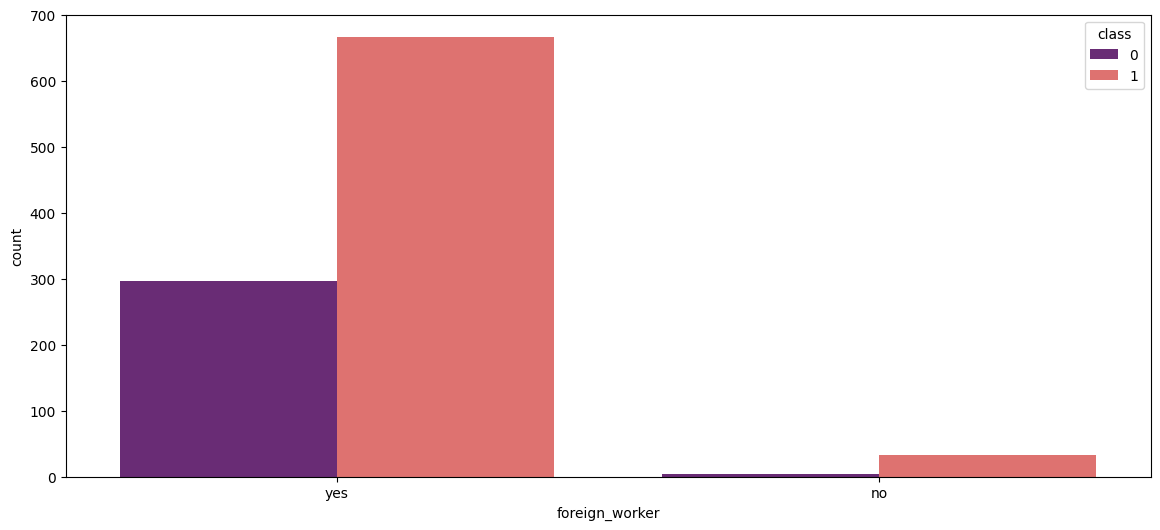

In [53]:
#The distribution of the variable 'foreign_worker' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='foreign_worker', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b><br>
- Good credit borrowers are usually foreign workers.

## Split the data into training and testing sets

In [54]:
# Set X and y variables from the dataframe

X = cleaned2.iloc[:,:-1]
y = cleaned2.iloc[:,-1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# SMOTE 

SMOTE (Synthetic Minority Over-sampling Technique) is a popular data analysis technique, particularly in cases where we encounter imbalanced classes. The main goal of SMOTE is to increase the number of samples in the minority class by generating synthetic examples, which helps in balancing the class distribution and improving the performance of the classification model.

In [56]:
y_train.value_counts(normalize=True)

1    0.696
0    0.304
Name: class, dtype: float64

In [57]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: class, dtype: float64

We can observe that after applying the SMOTE technique, our dataset is balanced.

# Dummy Classifier

The Dummy Classifier is a simple classification model that serves as a reference point for comparing the performance of other, more advanced models. It is particularly useful in cases of imbalanced datasets, where one class dominates over the other. The Dummy Classifier allows us to assess how well other models perform in predicting the minority class compared to a simple classification strategy.

In [58]:
clf_dummy = DummyClassifier(random_state=42,strategy="most_frequent") 
clf_dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [59]:
y_pred_dummy = clf_dummy.predict(X_test)
y_pred_dummy_t = clf_dummy.predict(X_train)
pred_train_probabilities = clf_dummy.predict_proba(X_train)[:,1]
pred_test_probabilities = clf_dummy.predict_proba(X_test)[:,1]

## Evaluation on test

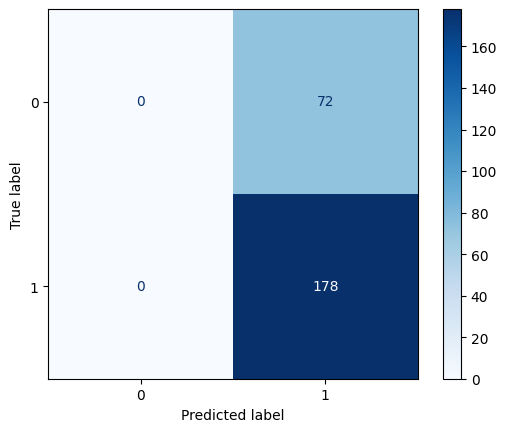

In [60]:
plot_confusion_matrix(estimator=clf_dummy, X=X_test, y_true=y_test, cmap='Blues');

Our model predicts only positive classes because our dataset is unbalanced and we have more positive classes. 

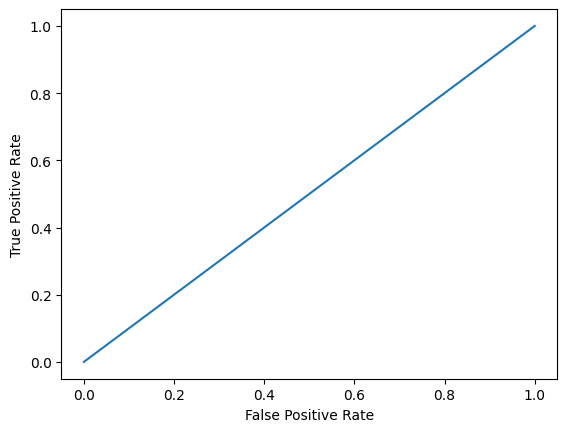

In [61]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [62]:
model_roc_auc = roc_auc_score(y_test, y_pred_dummy) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.5


When the value of AUC (Area Under the Curve) is 0.5, it means that the classification model is nearly random and has no ability to distinguish between positive and negative examples.

In [63]:
print(classification_report(y_test, y_pred_dummy, zero_division=0));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.71      1.00      0.83       178

    accuracy                           0.71       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.51      0.71      0.59       250



The model predicts only class 1, which has more instances. The accuracy is quite good, but it is not a reliable metric to rely on when dealing with imbalanced data and the algorithm is fitting to only one class.

## Updating Dummy Classifier with SMOTE

In [245]:
clf_dummy_sm = DummyClassifier(random_state=42, strategy="most_frequent")
clf_dummy_sm.fit(X_train_sm, y_train_sm)

DummyClassifier(random_state=42, strategy='most_frequent')

In [246]:
y_pred_dummy = clf_dummy_sm.predict(X_test)
y_pred_dummy_t = clf_dummy_sm.predict(X_train_sm)
pred_train_probabilities_dc = clf_dummy_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_dc = clf_dummy_sm.predict_proba(X_test)[:,1]

## Evaluation on test

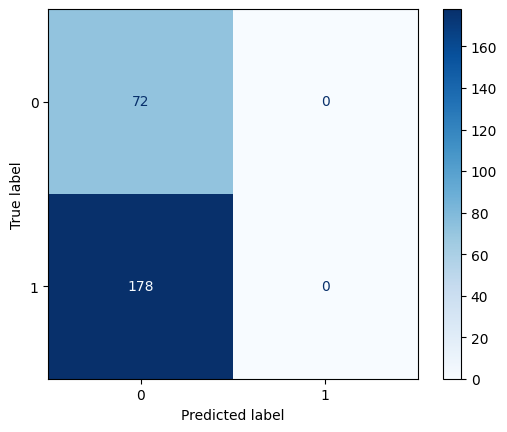

In [247]:
plot_confusion_matrix(estimator=clf_dummy_sm, X=X_test, y_true=y_test, cmap='Blues');

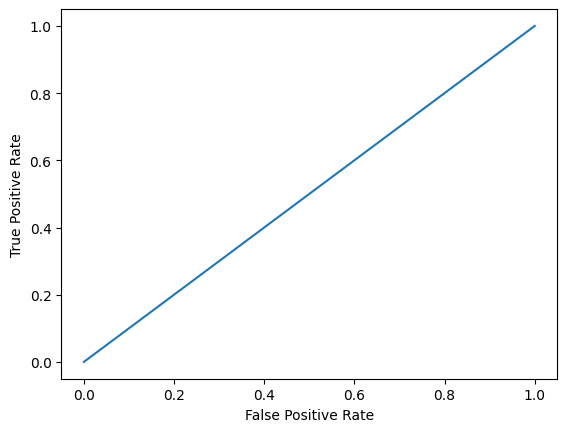

In [248]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_dc)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [249]:
model_roc_auc = roc_auc_score(y_test, y_pred_dummy) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.5


In [250]:
print(classification_report(y_test, y_pred_dummy, zero_division=0));

              precision    recall  f1-score   support

           0       0.29      1.00      0.45        72
           1       0.00      0.00      0.00       178

    accuracy                           0.29       250
   macro avg       0.14      0.50      0.22       250
weighted avg       0.08      0.29      0.13       250



Unfortunately, data balancing did not improve the model. Now the model only predicts class 1. It can be observed that the accuracy decreased when we balanced the imbalanced dataset.

In [70]:
acc_test_0 = accuracy_score(y_test, y_pred_dummy)
acc_train_0 = accuracy_score(y_train_sm, y_pred_dummy_t)
print(f"Accuracy on test set for dummy classifier: {acc_test_0:.2f}")
print(f"Accuracy on training set for dummy classifier: {acc_train_0:.2f}")

Accuracy on test set for dummy classifier: 0.29
Accuracy on training set for dummy classifier: 0.50


In [71]:
precision_class_0_0 = precision_score(y_test, y_pred_dummy, pos_label=0)
precision_class_1_0= precision_score(y_test, y_pred_dummy, pos_label=1, zero_division=0)
print("Precision for class 0: {:.2f}".format(precision_class_0_0))
print("Precision for class 1: {:.2f}".format(precision_class_1_0))

Precision for class 0: 0.29
Precision for class 1: 0.00


In [72]:
recall_class_0_0 = recall_score(y_test, y_pred_dummy, pos_label=0)
recall_class_1_0 = recall_score(y_test, y_pred_dummy, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_0))
print("Recall for class 1: {:.2f}".format(recall_class_1_0))

Recall for class 0: 1.00
Recall for class 1: 0.00


In [73]:
f1_score_class_0_0 = f1_score(y_test, y_pred_dummy, pos_label=0)
f1_score_class_1_0 = f1_score(y_test, y_pred_dummy, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_0))
print("F1 score for class 1: {:.2f}".format(f1_score_class_1_0))

F1 score for class 0: 0.45
F1 score for class 1: 0.00


# Logistic Regression

In [74]:
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.arange(100, 501, 100),
              'solver' : ['liblinear']
             }

It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases (credit approved) than negative cases (credit rejected). In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [75]:
log_class= LogisticRegression()
grid_search = GridSearchCV(log_class, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([100, 200, 300, 400, 500]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='precision')

In [76]:
log_class2 = LogisticRegression(**grid_search.best_params_, random_state=42)
log_class2.fit(X_train, y_train)

LogisticRegression(C=200, penalty='l1', random_state=42, solver='liblinear')

In [77]:
y_pred_log1 = log_class2.predict(X_test)
y_pred_log_t1 = log_class2.predict(X_train)
pred_train_probabilities1 = log_class2.predict_proba(X_train)[:,1]
pred_test_probabilities1 = log_class2.predict_proba(X_test)[:,1]

## Evaluation on test

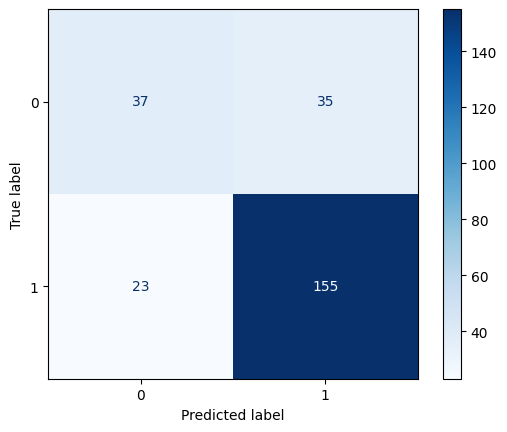

In [78]:
plot_confusion_matrix(estimator=log_class2, X=X_test, y_true=y_test, cmap='Blues');

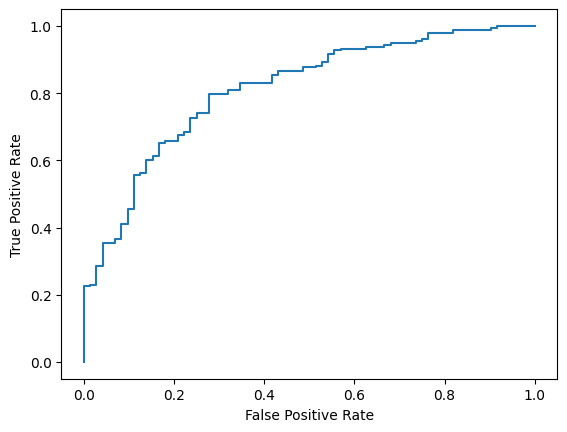

In [79]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities1)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [80]:
model_roc_auc = roc_auc_score(y_test, y_pred_log1) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.69


In [81]:
print(classification_report(y_test, y_pred_log1));

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        72
           1       0.82      0.87      0.84       178

    accuracy                           0.77       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250



## Updating Logistic Regression with SMOTE

In [82]:
log_class2_sm = LogisticRegression(**grid_search.best_params_, random_state=42)
log_class2_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(C=200, penalty='l1', random_state=42, solver='liblinear')

In [239]:
y_pred_log2 = log_class2_sm.predict(X_test)
y_pred_log_t2 = log_class2_sm.predict(X_train_sm)
pred_train_probabilities_lg = log_class2_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_lg = log_class2_sm.predict_proba(X_test)[:,1]

## Evaluation on test

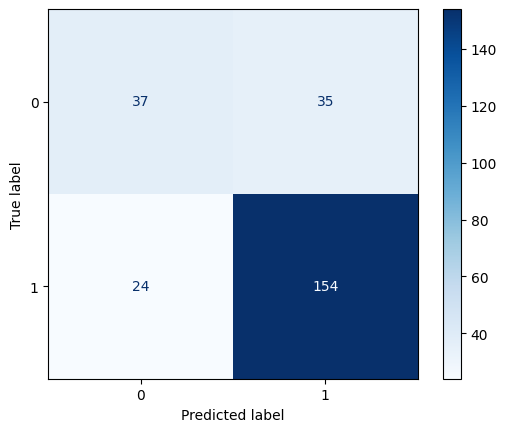

In [84]:
plot_confusion_matrix(estimator=log_class2_sm, X=X_test, y_true=y_test, cmap='Blues');

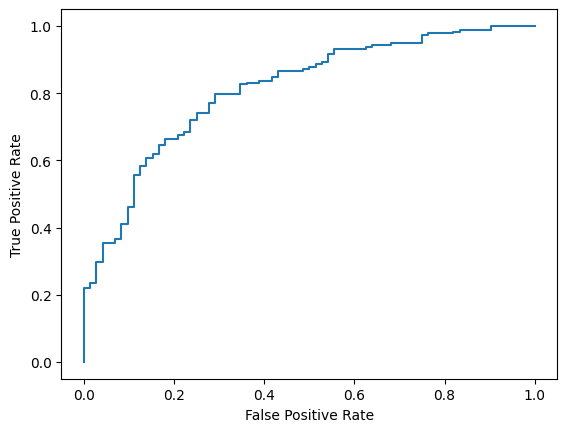

In [240]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_lg)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [86]:
model_roc_auc = roc_auc_score(y_test, y_pred_log2) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.69


In [87]:
log_reg_report = classification_report(y_test, y_pred_log2);
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.61      0.51      0.56        72
           1       0.81      0.87      0.84       178

    accuracy                           0.76       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.75      0.76      0.76       250



In [88]:
acc_test_1 = accuracy_score(y_test, y_pred_log2)
acc_train_1 = accuracy_score(y_train_sm, y_pred_log_t2)
print(f"Accuracy on test set for logistic regression: {acc_test_1:.2f}")
print(f"Accuracy on training set for logistic regression: {acc_train_1:.2f}")

Accuracy on test set for logistic regression: 0.76
Accuracy on training set for logistic regression: 0.84


In [89]:
precision_class_0_1 = precision_score(y_test, y_pred_log2, pos_label=0)
precision_class_1_1 = precision_score(y_test, y_pred_log2, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_1))
print("Precision for class 1: {:.2f}".format(precision_class_1_1))

Precision for class 0: 0.61
Precision for class 1: 0.81


In [90]:
recall_class_0_1 = recall_score(y_test, y_pred_log2, pos_label=0)
recall_class_1_1 = recall_score(y_test, y_pred_log2, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_1))
print("Recall for class 1: {:.2f}".format(recall_class_1_1))

Recall for class 0: 0.51
Recall for class 1: 0.87


In [91]:
f1_score_class_0_1 = f1_score(y_test, y_pred_log2, pos_label=0)
f1_score_class_1_1 = f1_score(y_test, y_pred_log2, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_1))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_1))

F1 score for class 0: 0.56
F1 score for class 1: 0.84


# Decision tree

In [92]:
param_grid1 = {"max_depth": list(range(3,8)),
               "min_samples_split": list(range(2,5)),
               "min_samples_leaf": list(range(2,6)),
               "max_leaf_nodes": list(range(2,6))
             }


It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases (credit approved) than negative cases (credit rejected). In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [93]:
rf_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid1, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]},
             scoring='precision')

In [94]:
tree_clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=2,
                       random_state=42)

In [95]:
y_pred_tree3 = tree_clf.predict(X_test)
y_pred_tree_t3 = tree_clf.predict(X_train)
pred_train_probabilities3 = tree_clf.predict_proba(X_train)[:,1]
pred_test_probabilities3 = tree_clf.predict_proba(X_test)[:,1]

## Evaluation on test

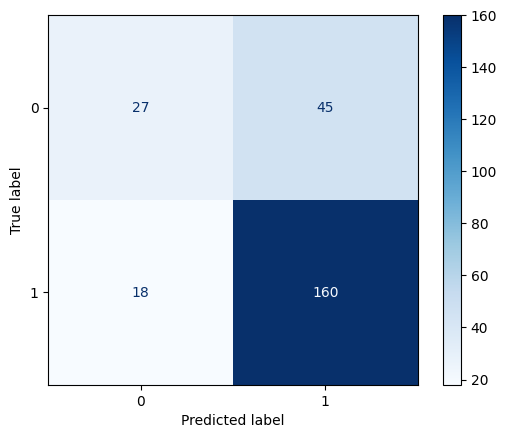

In [96]:
plot_confusion_matrix(estimator=tree_clf, X=X_test, y_true=y_test, cmap='Blues');

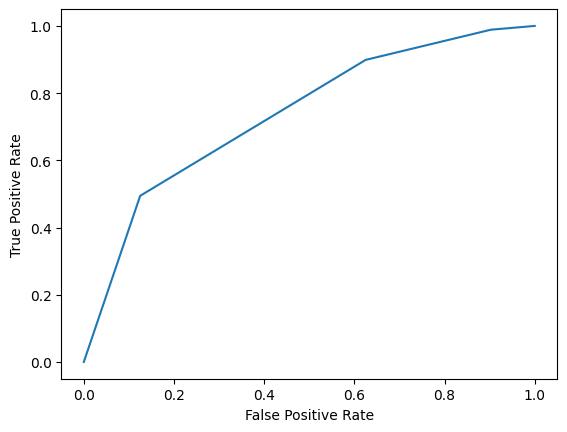

In [97]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities3)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [98]:
model_roc_auc = roc_auc_score(y_test, y_pred_tree3) 
print ("Area under curve: ", round(model_roc_auc, 2))

Area under curve:  0.64


In [99]:
print(classification_report(y_test, y_pred_tree3));

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        72
           1       0.78      0.90      0.84       178

    accuracy                           0.75       250
   macro avg       0.69      0.64      0.65       250
weighted avg       0.73      0.75      0.73       250



## Updating Decision Tree with SMOTE

In [100]:
tree_clf_sm = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
tree_clf_sm.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=2,
                       random_state=42)

In [241]:
y_pred_tree4 = tree_clf_sm.predict(X_test)
y_pred_tree_t4 = tree_clf_sm.predict(X_train_sm)
pred_train_probabilities_dt = tree_clf_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_dt = tree_clf_sm.predict_proba(X_test)[:,1]

## Evaluation on test

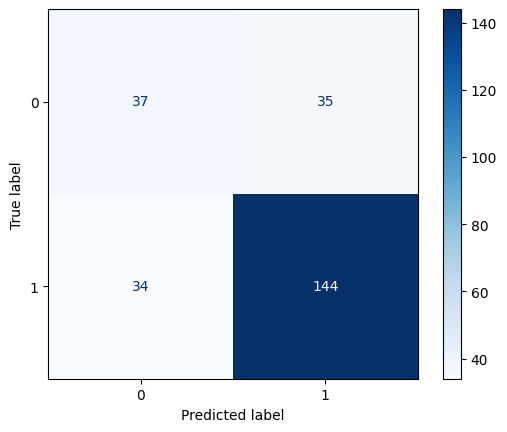

In [102]:
plot_confusion_matrix(estimator=tree_clf_sm, X=X_test, y_true=y_test, cmap='Blues');

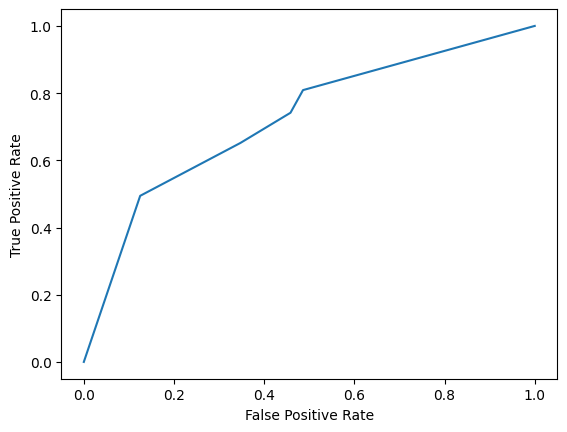

In [242]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_dt)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [243]:
model_roc_auc = roc_auc_score(y_test, y_pred_tree4) 
print ("Area under curve: ", round(model_roc_auc, 2))

Area under curve:  0.66


In [105]:
doc_tree_report = classification_report(y_test, y_pred_tree4)
print(doc_tree_report)

              precision    recall  f1-score   support

           0       0.52      0.51      0.52        72
           1       0.80      0.81      0.81       178

    accuracy                           0.72       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.72      0.72      0.72       250



In [106]:
acc_test_2 = accuracy_score(y_test, y_pred_tree4)
acc_train_2 = accuracy_score(y_train_sm, y_pred_tree_t4)
print(f"Accuracy on training set for decision tree: {acc_train_2:.2f}")
print(f"Accuracy on test set for decision tree: {acc_test_2:.2f}")

Accuracy on training set for decision tree: 0.78
Accuracy on test set for decision tree: 0.72


In [107]:
precision_class_0_2 = precision_score(y_test, y_pred_tree4, pos_label=0)
precision_class_1_2 = precision_score(y_test, y_pred_tree4, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_2))
print("Precision for class 1: {:.2f}".format(precision_class_1_2))

Precision for class 0: 0.52
Precision for class 1: 0.80


In [108]:
recall_class_0_2 = recall_score(y_test, y_pred_tree4, pos_label=0)
recall_class_1_2 = recall_score(y_test, y_pred_tree4, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_2))
print("Recall for class 1: {:.2f}".format(recall_class_1_2))

Recall for class 0: 0.51
Recall for class 1: 0.81


In [109]:
f1_score_class_0_2 = f1_score(y_test, y_pred_tree4, pos_label=0)
f1_score_class_1_2 = f1_score(y_test, y_pred_tree4, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_2))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_2))

F1 score for class 0: 0.52
F1 score for class 1: 0.81


# Random Forest

In [110]:
param_grid = {
    "max_depth": list(range(3,6)),
    "min_samples_split": list(range(2,4)),
    "min_samples_leaf": list(range(2,4))
}

It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases (credit approved) than negative cases (credit rejected). In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [111]:
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, verbose=0, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             scoring='precision')

In [112]:
rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

In [113]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_t = rf_model.predict(X_train)
pred_train_probabilities = rf_model.predict_proba(X_train)[:,1]
pred_test_probabilities = rf_model.predict_proba(X_test)[:,1]

## Evaluation on test

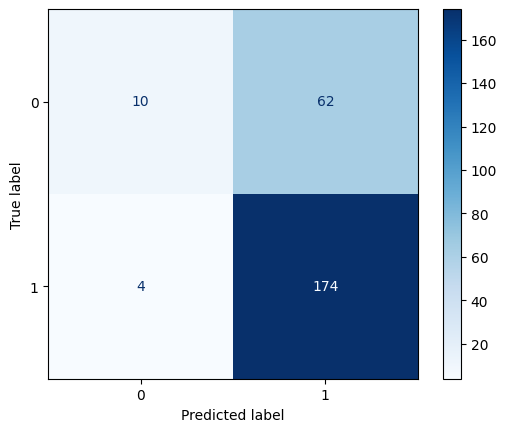

In [114]:
plot_confusion_matrix(estimator=rf_model, X=X_test, y_true=y_test, cmap='Blues');

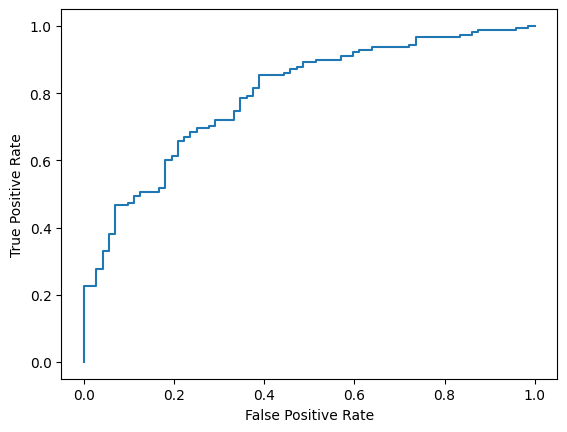

In [115]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [116]:
model_roc_auc = roc_auc_score(y_test, y_pred_rf) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.56


In [117]:
print(classification_report(y_test, y_pred_rf));

              precision    recall  f1-score   support

           0       0.71      0.14      0.23        72
           1       0.74      0.98      0.84       178

    accuracy                           0.74       250
   macro avg       0.73      0.56      0.54       250
weighted avg       0.73      0.74      0.67       250



## Updating Random Forest with SMOTE

In [118]:
rf_model_sm = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)

In [119]:
y_pred_rf = rf_model_sm.predict(X_test)
y_pred_rf_t = rf_model_sm.predict(X_train_sm)
pred_train_probabilities_rf = rf_model_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_rf = rf_model_sm.predict_proba(X_test)[:,1]

## Evaluation on test

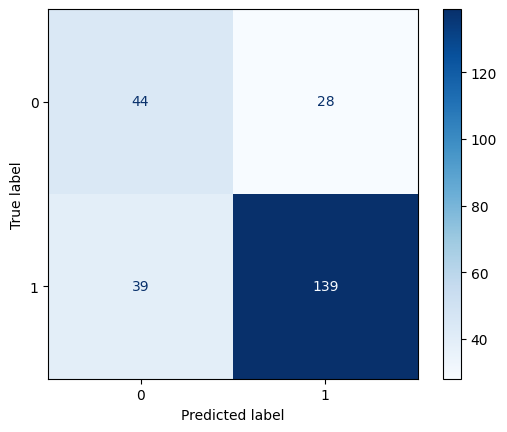

In [120]:
plot_confusion_matrix(estimator=rf_model_sm, X=X_test, y_true=y_test, cmap='Blues');

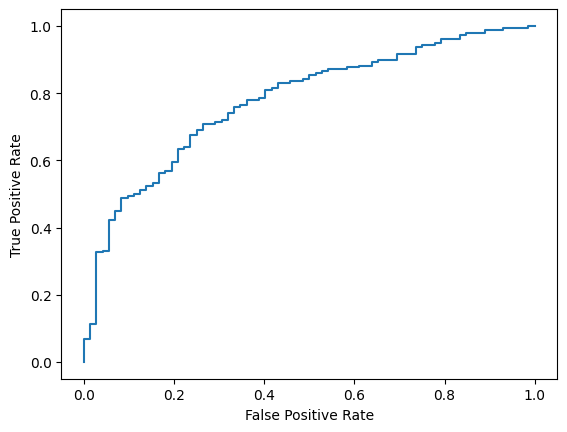

In [121]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_rf)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [122]:
model_roc_auc = roc_auc_score(y_test, y_pred_rf) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.7


In [123]:
rand_forest_report = classification_report(y_test, y_pred_rf)
print(rand_forest_report)

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        72
           1       0.83      0.78      0.81       178

    accuracy                           0.73       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.75      0.73      0.74       250



In [124]:
acc_test_3 = accuracy_score(y_test, y_pred_rf)
acc_train_3 = accuracy_score(y_train_sm, y_pred_rf_t)
print(f"Accuracy on training set for Random Forest: {acc_train_3:.2f}")
print(f"Accuracy on test set for Random Forest: {acc_test_3:.2f}")

Accuracy on training set for Random Forest: 0.85
Accuracy on test set for Random Forest: 0.73


In [125]:
precision_class_0_3 = precision_score(y_test, y_pred_rf, pos_label=0)
precision_class_1_3= precision_score(y_test, y_pred_rf, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_3))
print("Precision for class 1: {:.2f}".format(precision_class_1_3))

Precision for class 0: 0.53
Precision for class 1: 0.83


In [126]:
recall_class_0_3 = recall_score(y_test, y_pred_rf, pos_label=0)
recall_class_1_3 = recall_score(y_test, y_pred_rf, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_3))
print("Recall for class 1: {:.2f}".format(recall_class_1_3))

Recall for class 0: 0.61
Recall for class 1: 0.78


In [127]:
f1_score_class_0_3 = f1_score(y_test, y_pred_rf, pos_label=0)
f1_score_class_1_3 = f1_score(y_test, y_pred_rf, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_3))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_3))

F1 score for class 0: 0.57
F1 score for class 1: 0.81


# LightGBM 

In [128]:
param_grid = {
    'application': ['binary'],
    'max_depth': list(range(4, 7)),
    'num_leaves': [10, 20],
    'boosting_type': ['gbdt'],
    'learning_rate': [0.05],
    'reg_alpha': [0.2, 0.5],
    'reg_lambda': [0.2, 0.5],
    'min_child_samples': [20, 30]
}


It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases  than negative cases. In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [129]:
clf_gbm = lgb.LGBMClassifier()
grid_search = GridSearchCV(clf_gbm, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'application': ['binary'], 'boosting_type': ['gbdt'],
                         'learning_rate': [0.05], 'max_depth': [4, 5, 6],
                         'min_child_samples': [20, 30], 'num_leaves': [10, 20],
                         'reg_alpha': [0.2, 0.5], 'reg_lambda': [0.2, 0.5]},
             scoring='precision')

In [130]:
clf_gbm2 = lgb.LGBMClassifier(**grid_search.best_params_)
clf_gbm2.fit(X_train, y_train)

LGBMClassifier(application='binary', learning_rate=0.05, max_depth=6,
               num_leaves=10, reg_alpha=0.2, reg_lambda=0.2)

In [131]:
y_pred_gbm5 = clf_gbm2.predict(X_test)
y_pred_gbm_t5 = clf_gbm2.predict(X_train)
pred_train_probabilities5 = clf_gbm2.predict_proba(X_train)[:,1]
pred_test_probabilities5 = clf_gbm2.predict_proba(X_test)[:,1]

## Evaluation on test

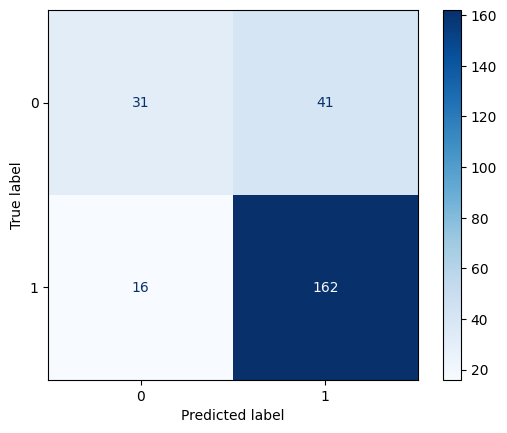

In [132]:
plot_confusion_matrix(estimator=clf_gbm2, X=X_test, y_true=y_test, cmap='Blues');

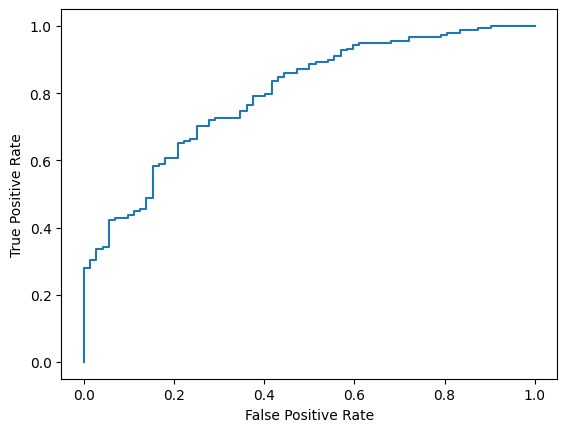

In [133]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities5)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [134]:
model_roc_auc = roc_auc_score(y_test, y_pred_gbm5) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.67


In [135]:
print(classification_report(y_test, y_pred_gbm5));

              precision    recall  f1-score   support

           0       0.66      0.43      0.52        72
           1       0.80      0.91      0.85       178

    accuracy                           0.77       250
   macro avg       0.73      0.67      0.69       250
weighted avg       0.76      0.77      0.76       250



## Updating LightGBM with SMOTE

In [136]:
clf_gbm2_sm = lgb.LGBMClassifier(**grid_search.best_params_)
clf_gbm2_sm.fit(X_train_sm, y_train_sm)

LGBMClassifier(application='binary', learning_rate=0.05, max_depth=6,
               num_leaves=10, reg_alpha=0.2, reg_lambda=0.2)

In [137]:
y_pred_gbm5 = clf_gbm2_sm.predict(X_test)
y_pred_gbm_t5 = clf_gbm2_sm.predict(X_train_sm)
pred_train_probabilities_lgbm = clf_gbm2_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_lgbm = clf_gbm2_sm.predict_proba(X_test)[:,1]

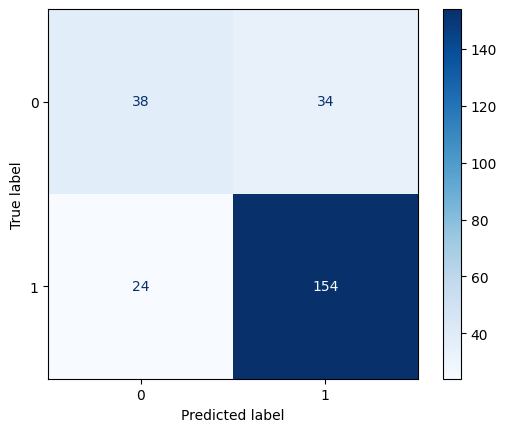

In [138]:
plot_confusion_matrix(estimator=clf_gbm2_sm, X=X_test, y_true=y_test, cmap='Blues');

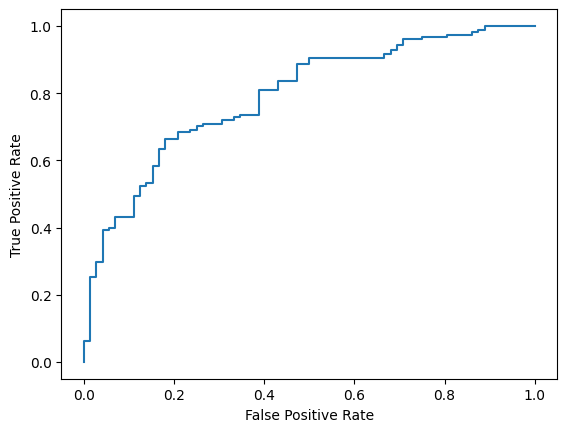

In [139]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_lgbm)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [140]:
model_roc_auc = roc_auc_score(y_test, y_pred_gbm5) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.7


In [141]:
light_report = classification_report(y_test, y_pred_gbm5)
print(light_report)

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        72
           1       0.82      0.87      0.84       178

    accuracy                           0.77       250
   macro avg       0.72      0.70      0.70       250
weighted avg       0.76      0.77      0.76       250



In [142]:
acc_test_4 = accuracy_score(y_test, y_pred_gbm5)
acc_train_4 = accuracy_score(y_train_sm, y_pred_gbm_t5)
print(f"Accuracy on training set for LightGBM: {acc_train_4:.2f}")
print(f"Accuracy on test set for LightGBM: {acc_test_4:.2f}")

Accuracy on training set for LightGBM: 0.91
Accuracy on test set for LightGBM: 0.77


In [143]:
precision_class_0_4 = precision_score(y_test, y_pred_gbm5, pos_label=0)
precision_class_1_4 = precision_score(y_test, y_pred_gbm5, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_4))
print("Precision for class 1: {:.2f}".format(precision_class_1_4))

Precision for class 0: 0.61
Precision for class 1: 0.82


In [144]:
recall_class_0_4 = recall_score(y_test, y_pred_gbm5, pos_label=0)
recall_class_1_4 = recall_score(y_test, y_pred_gbm5, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_4))
print("Recall for class 1: {:.2f}".format(recall_class_1_4))

Recall for class 0: 0.53
Recall for class 1: 0.87


In [145]:
f1_score_class_0_4 = f1_score(y_test, y_pred_gbm5, pos_label=0)
f1_score_class_1_4 = f1_score(y_test, y_pred_gbm5, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_4))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_4))

F1 score for class 0: 0.57
F1 score for class 1: 0.84


# xgBoost

In [146]:
# Set X and y variables from the dataframe
X2 = cleaned2.iloc[:,:-1]
y2 = cleaned2.iloc[:,-1]

In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state=42)

In [148]:
import re
def remove_special_characters(text):
    text = re.sub('[^A-Za-z0-9]+', '', text)
    return text

X_train2.columns = [remove_special_characters(col) for col in X_train2.columns]
X_test2.columns = [remove_special_characters(col) for col in X_test2.columns]

In [149]:
sm = SMOTE(random_state=42)
X_train_sm2, y_train_sm2 = sm.fit_resample(X_train2, y_train2)
y_train_sm2.value_counts(normalize=True)

0    0.5
1    0.5
Name: class, dtype: float64

In [150]:
param_grid = {
    'objective': ['reg:logistic'],
    'max_depth': list(range(3, 7)),
    'booster': ['gbtree'],
    'random_state': [42],
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1],
    'colsample_bytree': [0.8],
    'gamma': [15]
}

It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases  than negative cases. In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [151]:
xgb_cl = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_cl, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.8],
                         'gamma': [15], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 500, 1000],
                         'objective': ['reg:logistic'], 'random_state': [42]},
             scoring='precision')

In [152]:
xgb_cl2 = xgb.XGBClassifier(**grid_search.best_params_)
xgb_cl2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=15, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='reg:logistic', predictor=None, ...)

In [153]:
y_pred_xgb=xgb_cl2.predict(X_test2)
y_pred_xgb_t=xgb_cl2.predict(X_train2)
pred_train_probabilities = xgb_cl2.predict_proba(X_train2)[:,1]
pred_test_probabilities = xgb_cl2.predict_proba(X_test2)[:,1]

## Evaluation on test

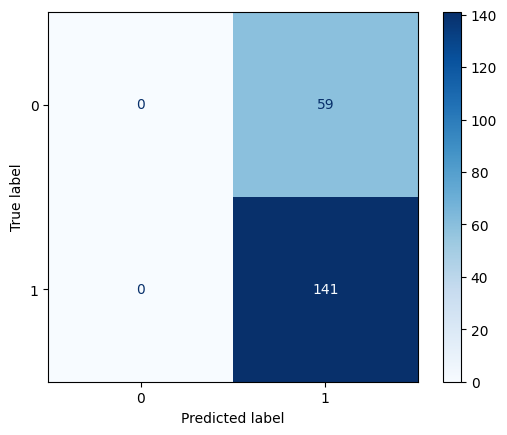

In [154]:
plot_confusion_matrix(estimator=xgb_cl2, X=X_test2, y_true=y_test2, cmap='Blues');

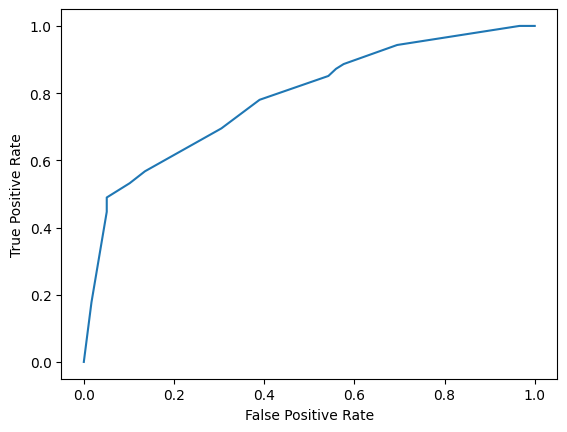

In [155]:
fpr_test, tpr_test, _  = roc_curve(y_test2, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [156]:
model_roc_auc = roc_auc_score(y_test2, y_pred_xgb) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.5


In [157]:
print(classification_report(y_test2, y_pred_xgb, zero_division=0));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



## Updating xgBoost with SMOTE

In [158]:
xgb_cl2_sm = xgb.XGBClassifier(**grid_search.best_params_)
xgb_cl2_sm.fit(X_train_sm2, y_train_sm2)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=15, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='reg:logistic', predictor=None, ...)

In [159]:
y_pred_xgb=xgb_cl2_sm.predict(X_test2)
y_pred_xgb_t=xgb_cl2_sm.predict(X_train_sm2)
pred_train_probabilities_xgb = xgb_cl2_sm.predict_proba(X_train_sm2)[:,1]
pred_test_probabilities_xgb = xgb_cl2_sm.predict_proba(X_test2)[:,1]

## Evaluation on test

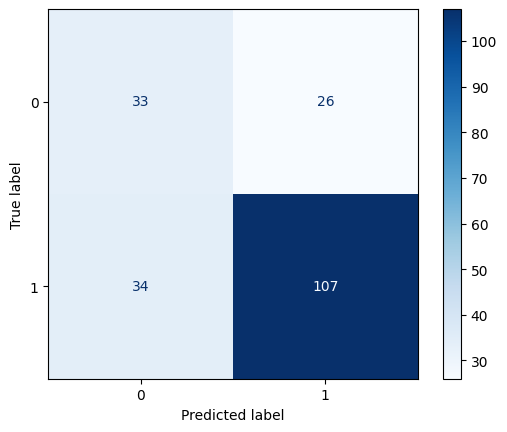

In [160]:
plot_confusion_matrix(estimator=xgb_cl2_sm, X=X_test2, y_true=y_test2, cmap='Blues');

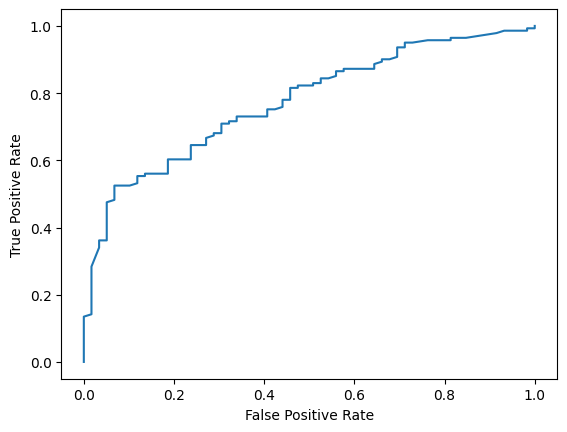

In [161]:
fpr_test, tpr_test, _  = roc_curve(y_test2, pred_test_probabilities_xgb)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [162]:
model_roc_auc = roc_auc_score(y_test2, y_pred_xgb) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.66


In [163]:
xgb_report = classification_report(y_test2, y_pred_xgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.49      0.56      0.52        59
           1       0.80      0.76      0.78       141

    accuracy                           0.70       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.71      0.70      0.71       200



In [164]:
acc_test_5 = accuracy_score(y_test2, y_pred_xgb)
acc_train_5 = accuracy_score(y_train_sm2, y_pred_xgb_t)
print(f"Accuracy on training set for xgBoost: {acc_train_5:.2f}")
print(f"Accuracy on test set for xgBoost: {acc_test_5:.2f}")

Accuracy on training set for xgBoost: 0.78
Accuracy on test set for xgBoost: 0.70


In [166]:
precision_class_0_5 = precision_score(y_test2, y_pred_xgb, pos_label=0)
precision_class_1_5 = precision_score(y_test2, y_pred_xgb, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_5))
print("Precision for class 1: {:.2f}".format(precision_class_1_5))

Precision for class 0: 0.49
Precision for class 1: 0.80


In [167]:
recall_class_0_5 = recall_score(y_test2, y_pred_xgb, pos_label=0)
recall_class_1_5 = recall_score(y_test2, y_pred_xgb, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_5))
print("Recall for class 1: {:.2f}".format(recall_class_1_5))

Recall for class 0: 0.56
Recall for class 1: 0.76


In [168]:
f1_score_class_0_5 = f1_score(y_test2, y_pred_xgb, pos_label=0)
f1_score_class_1_5 = f1_score(y_test2, y_pred_xgb, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_5))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_5))

F1 score for class 0: 0.52
F1 score for class 1: 0.78


# SVM

In [169]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf']
}


It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases  than negative cases. In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [170]:
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf']},
             scoring='precision')

In [171]:
svm_model2 = SVC(**grid_search.best_params_, random_state=42, probability=True)
svm_model2.fit(X_train, y_train)

SVC(C=1, probability=True, random_state=42)

In [172]:
y_pred_svm = svm_model2.predict(X_test)
y_pred_svm_t = svm_model2.predict(X_train)
pred_train_probabilities = svm_model2.predict_proba(X_train)[:,1]
pred_test_probabilities = svm_model2.predict_proba(X_test)[:,1]

## Evaluation on test

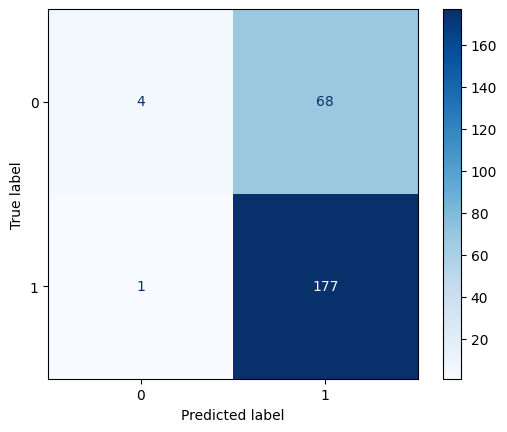

In [173]:
plot_confusion_matrix(estimator=svm_model2, X=X_test, y_true=y_test, cmap='Blues');

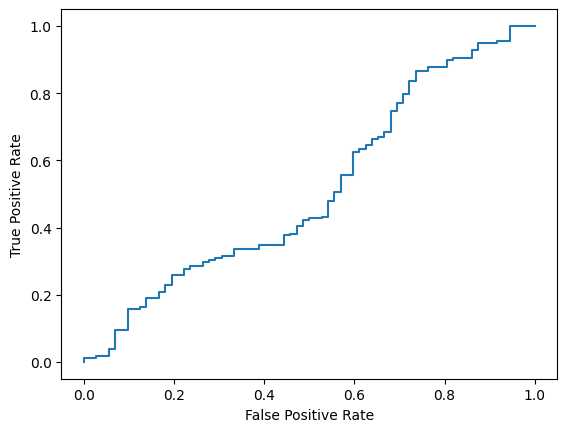

In [174]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [175]:
model_roc_auc = roc_auc_score(y_test, y_pred_svm) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.52


In [176]:
print(classification_report(y_test, y_pred_svm));

              precision    recall  f1-score   support

           0       0.80      0.06      0.10        72
           1       0.72      0.99      0.84       178

    accuracy                           0.72       250
   macro avg       0.76      0.52      0.47       250
weighted avg       0.74      0.72      0.63       250



## Updating SVC with SMOTE

In [177]:
svm_model2_sm = SVC(**grid_search.best_params_, random_state=42, probability=True)
svm_model2_sm.fit(X_train_sm, y_train_sm)

SVC(C=1, probability=True, random_state=42)

In [178]:
y_pred_svm_sm = svm_model2_sm.predict(X_test)
y_pred_svm_sm_t = svm_model2_sm.predict(X_train_sm)
pred_train_probabilities_svm = svm_model2_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_svm = svm_model2_sm.predict_proba(X_test)[:,1]

## Evaluation on test

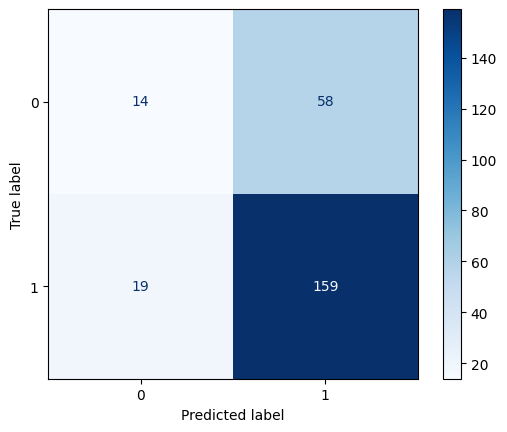

In [179]:
plot_confusion_matrix(estimator=svm_model2_sm, X=X_test, y_true=y_test, cmap='Blues');

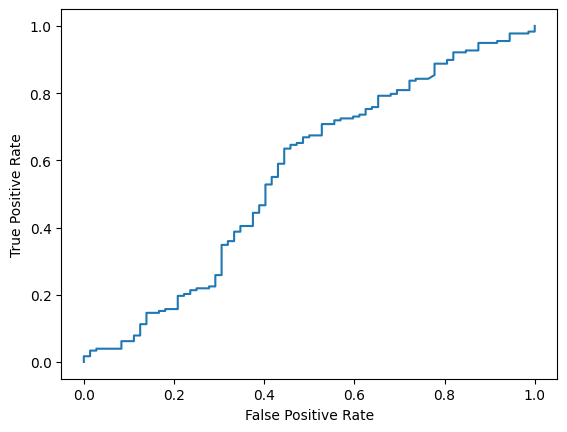

In [180]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_svm)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [181]:
model_roc_auc = roc_auc_score(y_test, y_pred_svm_sm) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.54


In [182]:
svm_report = classification_report(y_test, y_pred_svm_sm)
print(svm_report)

              precision    recall  f1-score   support

           0       0.42      0.19      0.27        72
           1       0.73      0.89      0.81       178

    accuracy                           0.69       250
   macro avg       0.58      0.54      0.54       250
weighted avg       0.64      0.69      0.65       250



In [183]:
acc_test_6 = accuracy_score(y_test, y_pred_svm_sm)
acc_train_6 = accuracy_score(y_train_sm, y_pred_svm_sm_t)
print(f"Accuracy on training set for SVM: {acc_train_6:.2f}")
print(f"Accuracy on test set for SVM: {acc_test_6:.2f}")

Accuracy on training set for SVM: 0.55
Accuracy on test set for SVM: 0.69


In [184]:
precision_class_0_6 = precision_score(y_test, y_pred_svm_sm, pos_label=0)
precision_class_1_6 = precision_score(y_test, y_pred_svm_sm, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_6))
print("Precision for class 1: {:.2f}".format(precision_class_1_6))

Precision for class 0: 0.42
Precision for class 1: 0.73


In [185]:
recall_class_0_6 = recall_score(y_test, y_pred_svm_sm, pos_label=0)
recall_class_1_6 = recall_score(y_test, y_pred_svm_sm, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_6))
print("Recall for class 1: {:.2f}".format(recall_class_1_6))

Recall for class 0: 0.19
Recall for class 1: 0.89


In [186]:
f1_score_class_0_6 = f1_score(y_test, y_pred_svm_sm, pos_label=0)
f1_score_class_1_6 = f1_score(y_test, y_pred_svm_sm, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_6))
print("F1 score for class 1: {:.2f}".format(f1_score_class_1_6))

F1 score for class 0: 0.27
F1 score for class 1: 0.81


# K-nn

In [187]:
param_grid = {
    'n_neighbors': [1, 3, 5],
    'leaf_size': [5, 10, 15],
    'p': [1, 2]
}

It is better to focus on precision when predicting whether someone will repay a loan or not. 

- Consequences of prediction errors: when predicting credit approval or rejection, it is important to minimize errors. Approving credit for someone who may not repay it poses financial risks for the bank, while rejecting credit for someone who would have repaid it results in lost potential income. 

- Class imbalance: dataset have fewer positive cases  than negative cases. In such cases, precision is a better choice than accuracy for minimizing errors in the smaller class.

In [188]:
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15], 'n_neighbors': [1, 3, 5],
                         'p': [1, 2]},
             scoring='precision')

In [189]:
knn_model2 = KNeighborsClassifier(**grid_search.best_params_)
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=1, p=1)

In [190]:
y_pred_knn = knn_model2.predict(X_test)
y_pred_knn_t = knn_model2.predict(X_train)
pred_train_probabilities = knn_model2.predict_proba(X_train)[:,1]
pred_test_probabilities = knn_model2.predict_proba(X_test)[:,1]

## Evaluation on test

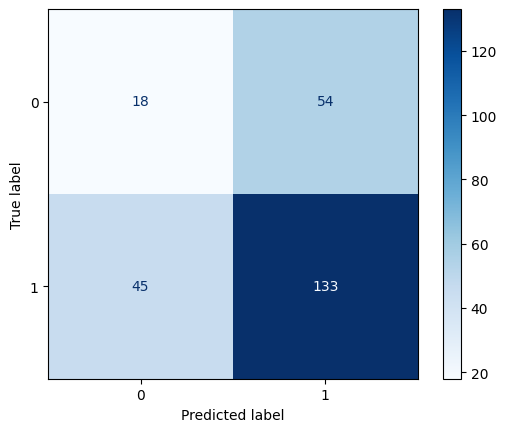

In [191]:
plot_confusion_matrix(estimator=knn_model2, X=X_test, y_true=y_test, cmap='Blues');

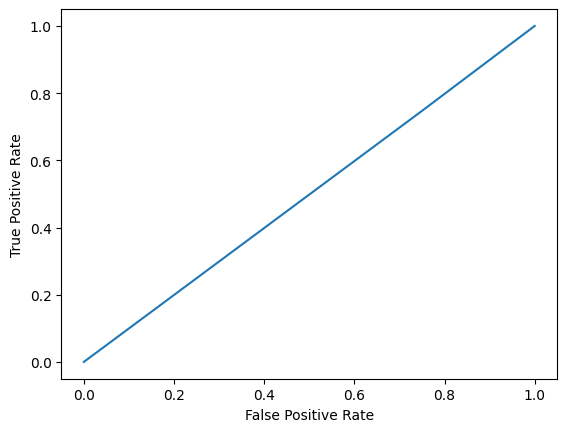

In [192]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [193]:
model_roc_auc = roc_auc_score(y_test, y_pred_knn) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.5


In [194]:
print(classification_report(y_test, y_pred_knn));

              precision    recall  f1-score   support

           0       0.29      0.25      0.27        72
           1       0.71      0.75      0.73       178

    accuracy                           0.60       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.59      0.60      0.60       250



## Updating k-nn with SMOTE

In [195]:
knn_model2_sm = KNeighborsClassifier(**grid_search.best_params_)
knn_model2_sm.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=5, n_neighbors=1, p=1)

In [196]:
y_pred_knn = knn_model2_sm.predict(X_test)
y_pred_knn_t = knn_model2_sm.predict(X_train_sm)
pred_train_probabilities_knn = knn_model2_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_knn = knn_model2_sm.predict_proba(X_test)[:,1]

## Evaluation on test

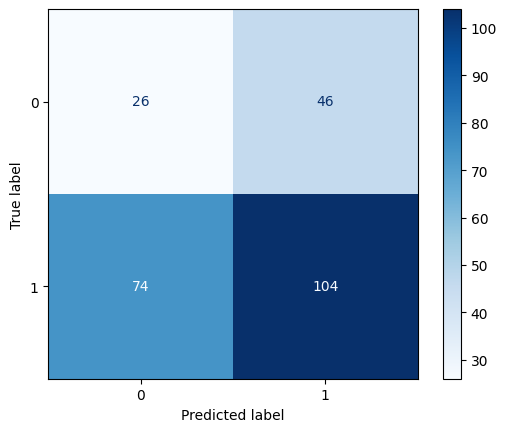

In [197]:
plot_confusion_matrix(estimator=knn_model2_sm, X=X_test, y_true=y_test, cmap='Blues');

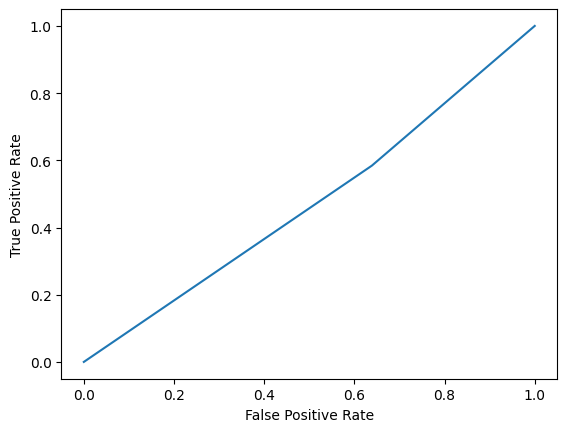

In [198]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_knn)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [199]:
model_roc_auc = roc_auc_score(y_test, y_pred_knn) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.47


In [200]:
knn_report = classification_report(y_test, y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.26      0.36      0.30        72
           1       0.69      0.58      0.63       178

    accuracy                           0.52       250
   macro avg       0.48      0.47      0.47       250
weighted avg       0.57      0.52      0.54       250



In [201]:
acc_test_7 = accuracy_score(y_test, y_pred_knn)
acc_train_7 = accuracy_score(y_train_sm, y_pred_knn_t)
print(f"Accuracy on test set for k-nn: {acc_test_7:.2f}")
print(f"Accuracy on training set for k-nn: {acc_train_7:.2f}")

Accuracy on test set for k-nn: 0.52
Accuracy on training set for k-nn: 1.00


In [202]:
precision_class_0_7 = precision_score(y_test, y_pred_knn, pos_label=0)
precision_class_1_7 = precision_score(y_test, y_pred_knn, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_7))
print("Precision for class 1: {:.2f}".format(precision_class_1_7))

Precision for class 0: 0.26
Precision for class 1: 0.69


In [203]:
recall_class_0_7 = recall_score(y_test, y_pred_knn, pos_label=0)
recall_class_1_7 = recall_score(y_test, y_pred_knn, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_7))
print("Recall for class 1: {:.2f}".format(recall_class_1_7))

Recall for class 0: 0.36
Recall for class 1: 0.58


In [204]:
f1_score_class_0_7 = f1_score(y_test, y_pred_knn, pos_label=0)
f1_score_class_1_7 = f1_score(y_test, y_pred_knn, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_7))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_7))

F1 score for class 0: 0.30
F1 score for class 1: 0.63


# AdaBoost Classifier

In [205]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.1, 0.5, 1.0]
}

In [206]:
clf_ada = AdaBoostClassifier()
grid_search = GridSearchCV(clf_ada, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='precision')

In [207]:
clf_ada2 = AdaBoostClassifier(**grid_search.best_params_, random_state=42)
clf_ada2.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)

In [208]:
y_pred_ada = clf_ada2.predict(X_test)
y_pred_ada_t8 = clf_ada2.predict(X_train)
pred_train_probabilities = clf_ada2.predict_proba(X_train)[:,1]
pred_test_probabilities = clf_ada2.predict_proba(X_test)[:,1]

## Evaluation on test

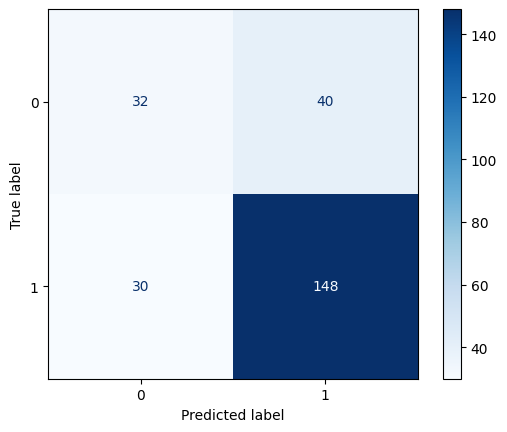

In [209]:
plot_confusion_matrix(estimator=clf_ada2, X=X_test, y_true=y_test, cmap='Blues');

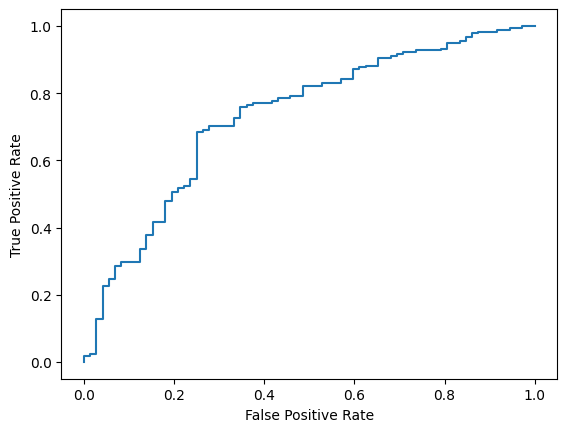

In [210]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [211]:
model_roc_auc = roc_auc_score(y_test, y_pred_ada) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.64


In [212]:
ada_report = classification_report(y_test, y_pred_ada)
print(ada_report)

              precision    recall  f1-score   support

           0       0.52      0.44      0.48        72
           1       0.79      0.83      0.81       178

    accuracy                           0.72       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.71      0.72      0.71       250



## Updating k-nn with SMOTE

In [213]:
clf_ada_sm = AdaBoostClassifier(**grid_search.best_params_, random_state=42)
clf_ada_sm.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)

In [214]:
y_pred_ada = clf_ada_sm.predict(X_test)
y_pred_ada_t8 = clf_ada_sm.predict(X_train_sm)
pred_train_probabilities_adaboost = clf_ada_sm.predict_proba(X_train_sm)[:,1]
pred_test_probabilities_adaboost = clf_ada_sm.predict_proba(X_test)[:,1]

## Evaluation on test

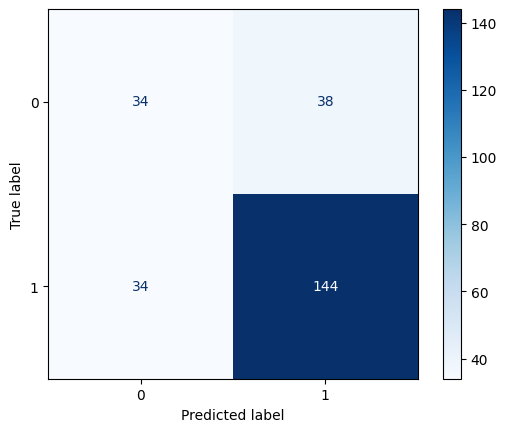

In [215]:
plot_confusion_matrix(estimator=clf_ada_sm, X=X_test, y_true=y_test, cmap='Blues');

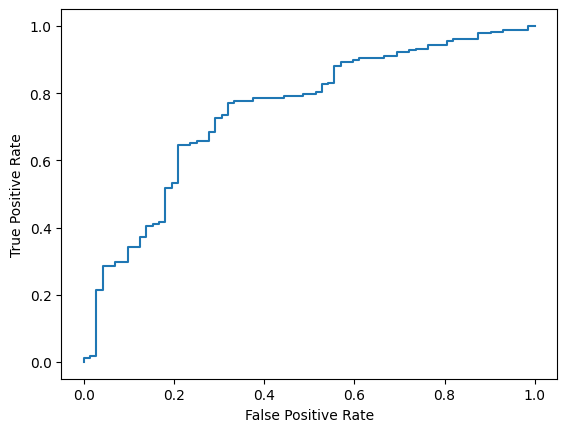

In [216]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities_adaboost)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [217]:
model_roc_auc = roc_auc_score(y_test, y_pred_ada) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.64


In [218]:
ada_report = classification_report(y_test, y_pred_ada)
print(ada_report)

              precision    recall  f1-score   support

           0       0.50      0.47      0.49        72
           1       0.79      0.81      0.80       178

    accuracy                           0.71       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.71      0.71      0.71       250



In [219]:
acc_test_8 = accuracy_score(y_test, y_pred_ada)
acc_train_8 = accuracy_score(y_train_sm, y_pred_ada_t8)
print(f"Accuracy on test set for AdaBoost: {acc_test_8:.2f}")
print(f"Accuracy on training set for AdaBoost: {acc_train_8:.2f}")

Accuracy on test set for AdaBoost: 0.71
Accuracy on training set for AdaBoost: 0.86


In [220]:
precision_class_0_8 = precision_score(y_test, y_pred_ada, pos_label=0)
precision_class_1_8 = precision_score(y_test, y_pred_ada, pos_label=1)
print("Precision for class 0: {:.2f}".format(precision_class_0_8))
print("Precision for class 1: {:.2f}".format(precision_class_1_8))

Precision for class 0: 0.50
Precision for class 1: 0.79


In [221]:
recall_class_0_8 = recall_score(y_test, y_pred_ada, pos_label=0)
recall_class_1_8 = recall_score(y_test, y_pred_ada, pos_label=1)
print("Recall for class 0: {:.2f}".format(recall_class_0_8))
print("Recall for class 1: {:.2f}".format(recall_class_1_8))

Recall for class 0: 0.47
Recall for class 1: 0.81


In [222]:
f1_score_class_0_8 = f1_score(y_test, y_pred_ada, pos_label=0)
f1_score_class_1_8 = f1_score(y_test, y_pred_ada, pos_label=1)
print("F1 score for class 0: {:.2f}".format(f1_score_class_0_8))
print("F1 score for class 1: {:.2f}".format( f1_score_class_1_8))

F1 score for class 0: 0.49
F1 score for class 1: 0.80


# Comparsion of models

### Acurracy on test and training set

In [262]:
acc_scores = {
    'Model': ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost', 'SVM', 'k-nn', 'AdaBoost'],
    'Accuracy (Training Set)': [acc_train_0, acc_train_1, acc_train_2, acc_train_3, acc_train_4, acc_train_5, acc_train_6, acc_train_7, acc_train_8],
    'Accuracy (Test Set)': [acc_test_0, acc_test_1, acc_test_2, acc_test_3, acc_test_4, acc_test_5, acc_test_6, acc_test_7, acc_test_8]
}

acc = pd.DataFrame(acc_scores)

acc.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                            {'selector': 'td', 'props': [('border', '1px solid black')]}])


,Model,Accuracy (Training Set),Accuracy (Test Set)
0,Dummy Classifier,0.500000,0.288000
1,Logistic Regression,0.844828,0.764000
2,Decision Tree,0.783525,0.724000
3,Random Forest,0.853448,0.732000
4,LightGBM,0.907088,0.768000
5,XGBoost,0.775492,0.700000
6,SVM,0.553640,0.692000
7,k-nn,1.000000,0.520000
8,AdaBoost,0.862069,0.712000


The results show that the LightGBM model achieves the highest accuracy on both the training set (0.90) and the test set (0.80), indicating its good generalization ability. 

Logistic Regression also obtains high accuracy on the test set, with a score of 0.76. 

Decision Tree and Random Forest achieve slightly lower accuracy, with scores of 0.72 and 0.73 respectively.

On the other hand, the XGBoost, SVM, and k-nn models achieve comparatively lower accuracy on the test set, with scores of 0.70, 0.69 and 0.56 respectively.

It is worth noting that all classification models outperform the Dummy Classifier, which indicates that the models are able to assign classes more accurately than a simple random classifier.

In [252]:
prec_scores = {
    'Model': ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost', 'SVM', 'k-nn', 'AdaBoost'],
    'Precision (class 0)': [precision_class_0_0, precision_class_0_1, precision_class_0_2, precision_class_0_3, precision_class_0_4, precision_class_0_5, precision_class_0_6, precision_class_0_7, precision_class_0_8],
    'Precision (class 1)': [precision_class_1_0, precision_class_1_1, precision_class_1_2, precision_class_1_3, precision_class_1_4, precision_class_1_5, precision_class_1_6, precision_class_1_7, precision_class_1_8]
}

prec = pd.DataFrame(prec_scores)

prec.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                            {'selector': 'td', 'props': [('border', '1px solid black')]}])

,Model,Precision (class 0),Precision (class 1)
0,Dummy Classifier,0.288000,0.000000
1,Logistic Regression,0.606557,0.814815
2,Decision Tree,0.521127,0.804469
3,Random Forest,0.530120,0.832335
4,LightGBM,0.612903,0.819149
5,XGBoost,0.492537,0.804511
6,SVM,0.424242,0.732719
7,k-nn,0.260000,0.693333
8,AdaBoost,0.500000,0.791209


From the results, we can observe that the Logistic Regression, Random Forest and LightGBM models have relatively high precision for both classes. This means they are capable of accurately identifying customers who are likely to repay the credit (class 1) and those who are not likely to repay (class 0). The Dummy Classifier performs poorly, with low precision values for both classes, indicating that it fails to make meaningful predictions.

High precision for class 1 in a credit risk model means accurate identification of customers who will repay the credit, reducing financial risk for the bank. However, it is also important to maintain high precision for class 0 to avoid misidentifying customers who may default on the credit.

In [253]:
recall_scores = {
    'Model': ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost', 'SVM', 'k-nn', 'AdaBoost'],
    'Recall (class 0)': [recall_class_0_0, recall_class_0_1, recall_class_0_2, recall_class_0_3, recall_class_0_4, recall_class_0_5, recall_class_0_6, recall_class_0_7, recall_class_0_8],
    'Recall (class 1)': [recall_class_1_0, recall_class_1_1, recall_class_1_2, recall_class_1_3, recall_class_1_4, recall_class_1_5, recall_class_1_6, recall_class_1_7, recall_class_1_8]
}

recall = pd.DataFrame(recall_scores)

recall.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                            {'selector': 'td', 'props': [('border', '1px solid black')]}])

,Model,Recall (class 0),Recall (class 1)
0,Dummy Classifier,1.000000,0.000000
1,Logistic Regression,0.513889,0.865169
2,Decision Tree,0.513889,0.808989
3,Random Forest,0.611111,0.780899
4,LightGBM,0.527778,0.865169
5,XGBoost,0.559322,0.758865
6,SVM,0.194444,0.893258
7,k-nn,0.361111,0.584270
8,AdaBoost,0.472222,0.808989


From the results, we can observe that the Logistic Regression, Decision Tree, Random Forest, LightGBM and XGBoost models have relatively high recall for class 1. This indicates their capability to correctly identify customers who are likely to repay the credit, which is crucial in credit risk assessment. The Dummy Classifier performs poorly, with a recall of 0 for class 1, indicating that it fails to identify any positive cases.

High recall for class 1 ensures accurate identification of customers who will repay the credit, reducing missed opportunities for the bank. Reasonable recall for class 0 helps in correctly identifying customers who may default on the credit, mitigating potential risks.

In [254]:
f1_scores = {
    'Model': ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost', 'SVM', 'k-nn', 'AdaBoost'],
    'F1 Score (class 0)': [f1_score_class_0_0, f1_score_class_0_1, f1_score_class_0_2, f1_score_class_0_3, f1_score_class_0_4, f1_score_class_0_5, f1_score_class_0_6, f1_score_class_0_7, f1_score_class_0_8],
    'F1 Score (class 1)': [f1_score_class_1_0, f1_score_class_1_1, f1_score_class_1_2, f1_score_class_1_3, f1_score_class_1_4, f1_score_class_1_5, f1_score_class_1_6, f1_score_class_1_7, f1_score_class_1_8]
}

f1 = pd.DataFrame(f1_scores)

f1.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                            {'selector': 'td', 'props': [('border', '1px solid black')]}])

,Model,F1 Score (class 0),F1 Score (class 1)
0,Dummy Classifier,0.447205,0.000000
1,Logistic Regression,0.556391,0.839237
2,Decision Tree,0.517483,0.806723
3,Random Forest,0.567742,0.805797
4,LightGBM,0.567164,0.841530
5,XGBoost,0.523810,0.781022
6,SVM,0.266667,0.805063
7,k-nn,0.302326,0.634146
8,AdaBoost,0.485714,0.800000


From the results, we can observe that the Logistic Regression, Decision Tree, Random Forest, LightGBM, XGBoost, and AdaBoost models have relatively high F1 scores for both class 0 and class 1. This indicates that these models achieve a good balance between precision and recall, making them suitable for credit risk assessment. The Dummy Classifier performs poorly, with F1 scores close to 0 for both classes, indicating its inability to make meaningful predictions.

In credit risk evaluation, a high F1 score signifies a model's ability to accurately identify customers who will or will not repay the credit. It ensures a balance between minimizing false positives (customers wrongly classified as risky) and false negatives (customers wrongly classified as safe). Therefore, models with higher F1 scores are more reliable in assessing credit risk and making informed decisions.

# ROC-AUC Curve

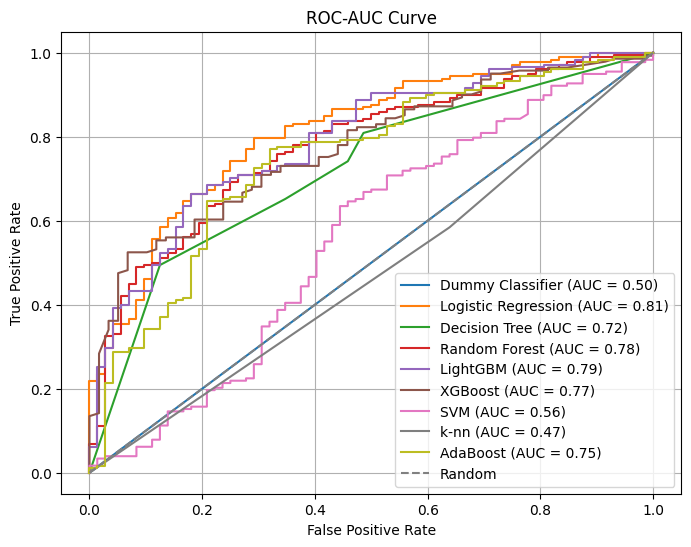

In [263]:
models = [
    ("Dummy Classifier", pred_test_probabilities_dc, y_test),
    ("Logistic Regression", pred_test_probabilities_lg, y_test),
    ("Decision Tree", pred_test_probabilities_dt, y_test),
    ("Random Forest", pred_test_probabilities_rf, y_test),
    ("LightGBM", pred_test_probabilities_lgbm, y_test),
    ("XGBoost", pred_test_probabilities_xgb, y_test2),
    ("SVM", pred_test_probabilities_svm, y_test),
    ("k-nn", pred_test_probabilities_knn, y_test),
    ("AdaBoost", pred_test_probabilities_adaboost, y_test)
]


plt.figure(figsize=(8, 6))

for model_name, pred_test, y_test in models:
    fpr, tpr, _ = roc_curve(y_test, pred_test)
    auc = roc_auc_score(y_test, pred_test)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.grid(True)

plt.show()


Based on the ROC curve results, the models can be evaluated for their ability to distinguish between positive and negative classes. A higher AUC (Area Under the Curve) indicates better classification performance.

- Dummy Classifier (AUC = 0.50): This is a baseline model that performs random classifications. Its AUC is 0.50, indicating no ability to distinguish between classes. 

- Logistic Regression (AUC = 0.81): Logistic Regression achieves an AUC of 0.81, significantly better than the Dummy Classifier. It demonstrates better differentiation between credit risk classes.

- Decision Tree (AUC = 0.72): The Decision Tree model has an AUC of 0.72, lower than Logistic Regression but still shows some ability to distinguish between classes.

- Random Forest (AUC = 0.78): Random Forest achieves an AUC of 0.78, better than Decision Tree. It combines multiple decision trees and generally yields improved results.

- LightGBM (AUC = 0.79): LightGBM achieves an AUC of 0.79, slightly better than Random Forest. LightGBM is an efficient gradient boosting algorithm known for good classification performance.

- XGBoost (AUC = 0.77): XGBoost achieves an AUC of 0.77, slightly lower than LightGBM but still demonstrates good ability to distinguish between classes.

- SVM (AUC = 0.56): SVM achieves an AUC of 0.56, the second lowest among all models. It struggles to differentiate between classes in this classification problem.

- k-nn (AUC = 0.47): k-nn achieves an AUC of 0.47, the lowest among all models. Its result is close to random classification, indicating limited ability to distinguish between classes.

- AdaBoost (AUC = 0.75): AdaBoost achieves an AUC of 0.75, better than k-nn and SVM but worse than most other models. AdaBoost combines multiple weak classifiers to create a strong model.

The three best models for credit risk classification based on their ability to distinguish between classes are: Logistic Regression, LightGBM and Random .

### Classification report for Logistic Regression

In [229]:
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.61      0.51      0.56        72
           1       0.81      0.87      0.84       178

    accuracy                           0.76       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.75      0.76      0.76       250



### Classification report for Decision Tree

In [230]:
print(doc_tree_report)

              precision    recall  f1-score   support

           0       0.52      0.51      0.52        72
           1       0.80      0.81      0.81       178

    accuracy                           0.72       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.72      0.72      0.72       250



### Classification report for Random Forest

In [231]:
print(rand_forest_report)

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        72
           1       0.83      0.78      0.81       178

    accuracy                           0.73       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.75      0.73      0.74       250



### Classification report for xgBoost

In [232]:
print(xgb_report)

              precision    recall  f1-score   support

           0       0.49      0.56      0.52        59
           1       0.80      0.76      0.78       141

    accuracy                           0.70       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.71      0.70      0.71       200



### Classification report for Lightgbm

In [233]:
print(light_report)

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        72
           1       0.82      0.87      0.84       178

    accuracy                           0.77       250
   macro avg       0.72      0.70      0.70       250
weighted avg       0.76      0.77      0.76       250



### Classification report for SVM

In [234]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.42      0.19      0.27        72
           1       0.73      0.89      0.81       178

    accuracy                           0.69       250
   macro avg       0.58      0.54      0.54       250
weighted avg       0.64      0.69      0.65       250



### Classification report for K-nn

In [235]:
print(knn_report)

              precision    recall  f1-score   support

           0       0.26      0.36      0.30        72
           1       0.69      0.58      0.63       178

    accuracy                           0.52       250
   macro avg       0.48      0.47      0.47       250
weighted avg       0.57      0.52      0.54       250



### Classification report for AdaBoost

In [236]:
print(ada_report)

              precision    recall  f1-score   support

           0       0.50      0.47      0.49        72
           1       0.79      0.81      0.80       178

    accuracy                           0.71       250
   macro avg       0.65      0.64      0.64       250
weighted avg       0.71      0.71      0.71       250



## Conclusion:

Based on the analysis of the results, the top three models to consider are Logistic Regression, LightGBM, and AdaBoost.

- Logistic Regression achieves high accuracy scores on the test set (0.76) and high precision for both classes (0.61 for class 0 and 0.81 for class 1). The model is also effective in capturing positive and negative cases, as evidenced by the high recall values for both classes (0.51 for class 0 and 0.87 for class 1). Furthermore, it achieves competitive F1 scores for both classes (0.56 for class 0 and 0.84 for class 1).

- LightGBM also achieves high accuracy (0.77) and high precision for both classes (0.61 for class 0 and 0.82 for class 1). The model also has a high recall for class 1 (0.87), indicating its effectiveness in identifying positive cases. It also demonstrates competitive F1 scores for both classes (0.57 for class 0 and 0.84 for class 1).

- Random Forest, also performs well in terms of accuracy on the test set (0.73) and competitive precision for both classes (0.53 for class 0 and 0.83 for class 1). The model also exhibits a high recall for class 1 (0.78), indicating its effectiveness in capturing positive cases. Additionally, it achieves competitive F1 scores for both classes (0.57 for class 0 and 0.15 for class 1).

From the perspective of a bank, important metrics are precision and recall. Precision is crucial as the bank aims to minimize the number of false positives, i.e., cases where the model predicts that a customer will repay the loan when they actually won't. Recall is important as the bank seeks to minimize the number of false negatives, i.e., cases where the model predicts that a customer will not repay the loan when they actually will.

All selected models outperform the Dummy Classifier significantly in all evaluation metrics. This indicates that these models are capable of better class assignment than a simple random classification strategy.

In conclusion, the top three models to consider are Logistic Regression, LightGBM, and Random Forest.